In [1]:
import pandas as pd
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


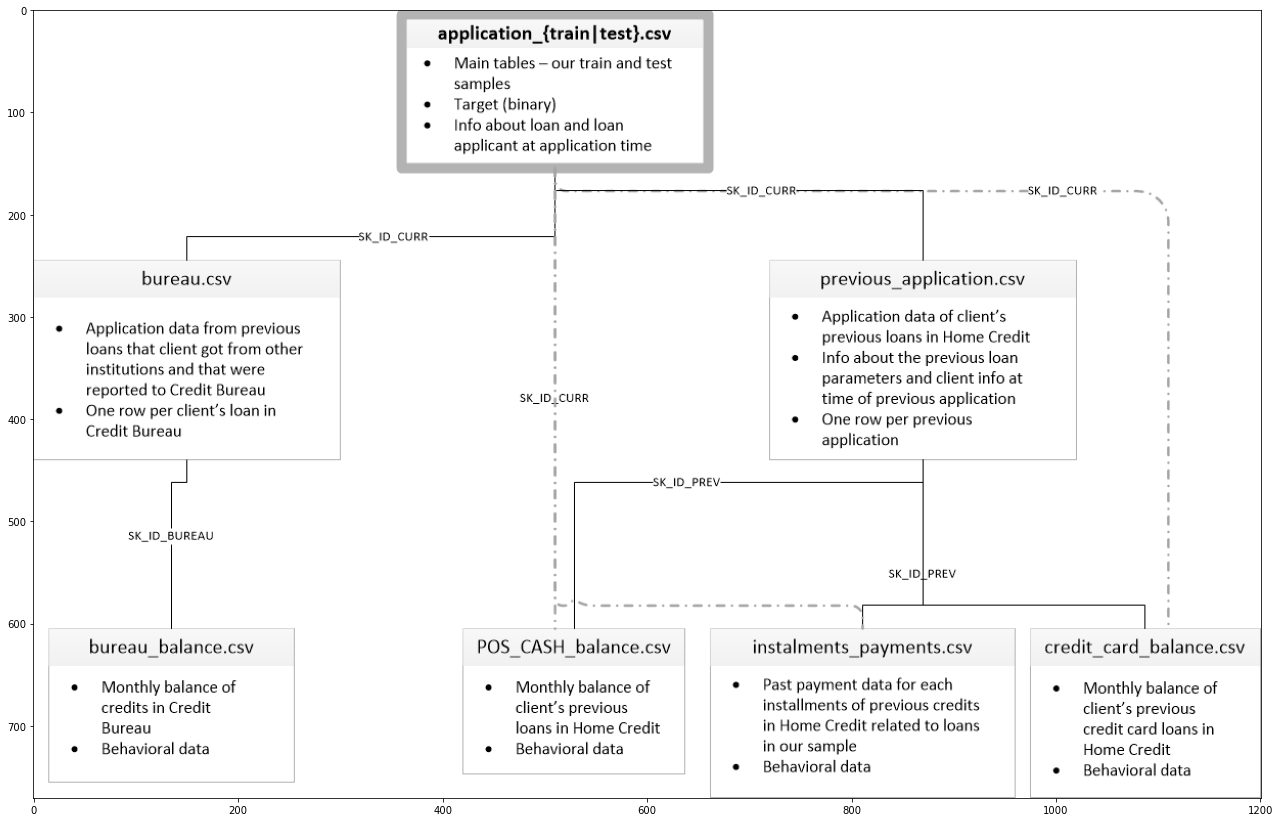

In [3]:
# Affichage de la structure de la base de données
img = cv2.imread("home_credit.png")
plt.figure(figsize=(22, 22))
plt.imshow(img)
plt.show()

# Sommaire

1. [App_train et app_test](#section1)
  1. [Analyse des Dataframes](#section1.1)
  2. [Features extraction](#section1.2)
  
2. [Previous Applications](#section2)
  1. [Analyse du tableau](#section2.1)
  2. [Features extraction](#section2.2)
  
3. [Credit Card](#section3)
  1. [Analyse du tableau](#section3.1)
  2. [Features extraction](#section3.2)

4. [Installments](#section4)
  1. [Analyse du tableau](#section4.1)
  2. [Features extraction](#section4.2)

5. [POScash](#section5)
  1. [Analyse du tableau](#section5.1)
  2. [Features extraction](#section5.2)

6. [Bureau et Bureau Balance](#section6)
  1. [Bureau Balance](#section6.1)
  2. [Bureau](#section6.2)
  3. [Features extraction](#section6.3)

7. [Extraction des données](#section7)

<a id="section1"> </a>
# 1. App_train et app_test

<a id="section1.1"> </a>
# A/ Analyse des dataframes

In [4]:
app=pd.read_csv('application_train.csv')

In [5]:
app_test=pd.read_csv('application_test.csv')

In [6]:
app=app.append(app_test).reset_index().copy()

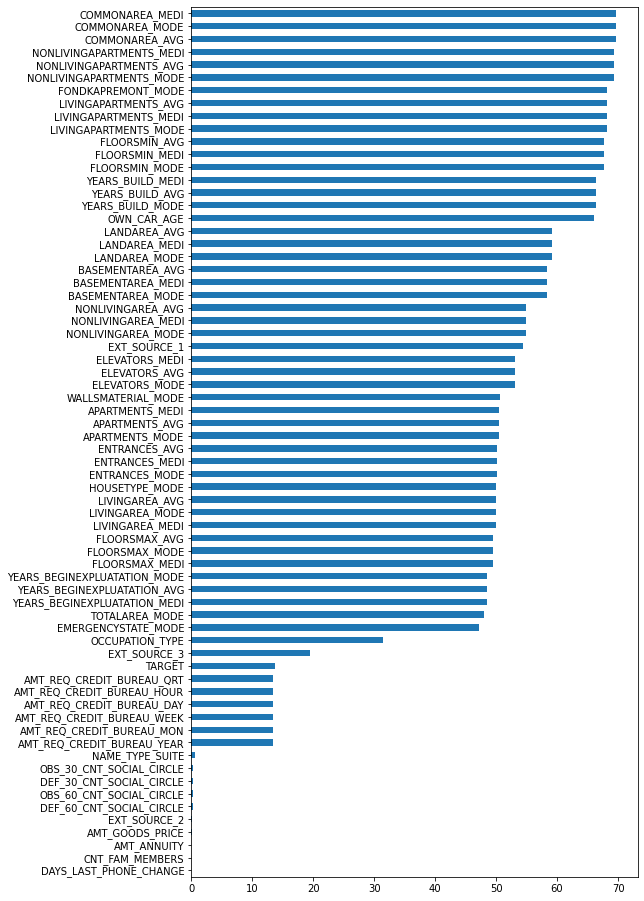

In [8]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in app.columns if app[i].isnull().any()]
percent_missing = app[nan_cols].isna().sum() * 100 / len(app)
plt.figure(figsize=(8, 16))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [9]:
#On va commencer par regarder ce qui a plus de 40% de nan:
nan_cols40 = [i for i in app.columns if app[i].isnull().sum()/len(app)>0.4]

In [10]:
homecredits=pd.read_csv('HomeCredit_columns_description.csv',encoding='cp1252')
homecredits.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [11]:
df=homecredits[homecredits.Table=='application_{train|test}.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in nan_cols:
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
TARGET  :  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
AMT_ANNUITY  :  Loan annuity
AMT_GOODS_PRICE  :  For consumer loans it is the price of the goods for which the loan is given
NAME_TYPE_SUITE  :  Who was accompanying client when he was applying for the loan
OWN_CAR_AGE  :  Age of client's car
OCCUPATION_TYPE  :  What kind of occupation does the client have
CNT_FAM_MEMBERS  :  How many family members does client have
EXT_SOURCE_1  :  Normalized score from external data source
EXT_SOURCE_2  :  Normalized score from external data source
EXT_SOURCE_3  :  Normalized score from external data source
APARTMENTS_AVG  :  Normalized in

In [12]:
nan_cols40.append('TARGET')
nan_cols40.append('FLAG_OWN_CAR')
nan=app[nan_cols40]

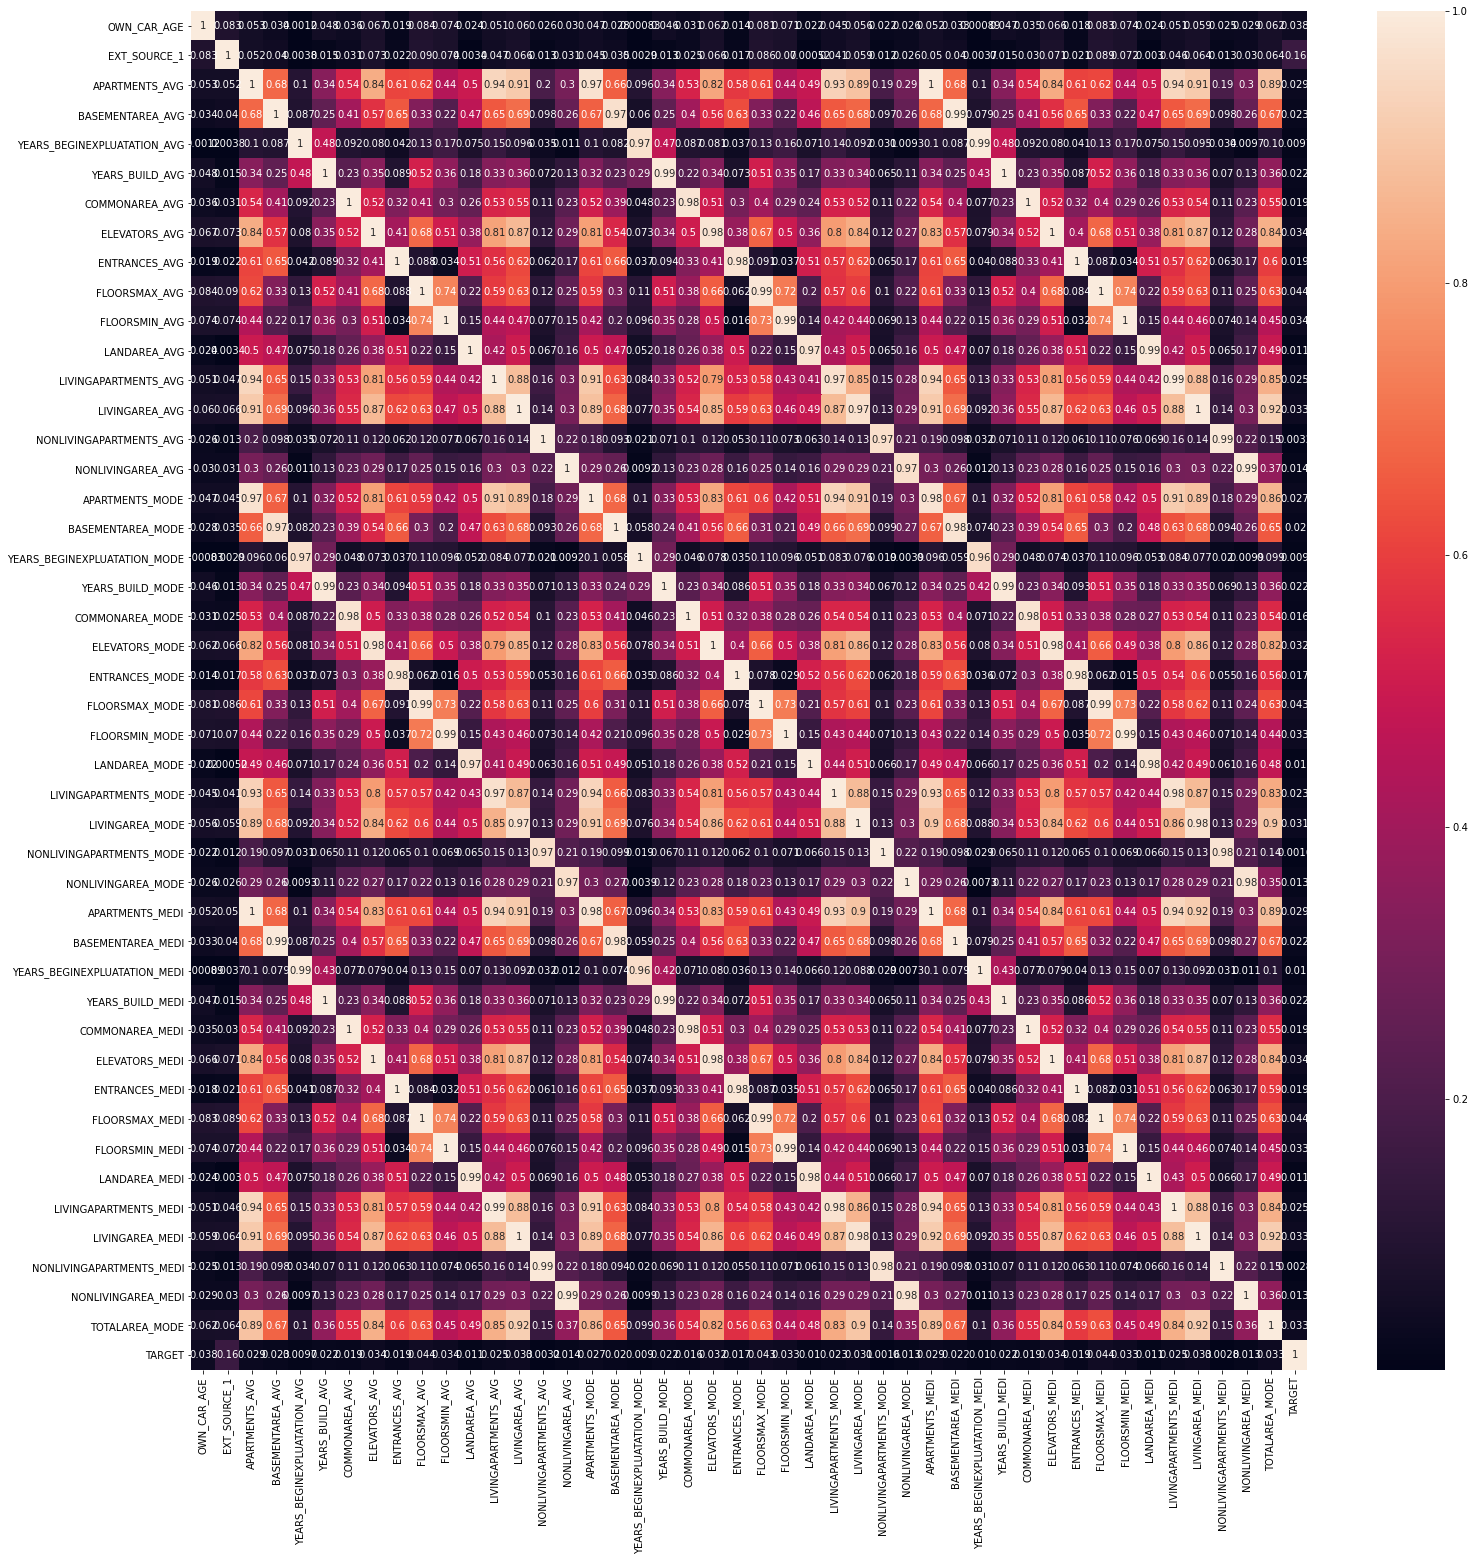

In [13]:
import seaborn as sn

corrMatrix = nan.corr()

plt.figure(figsize=(25,25))
sn.heatmap(abs(corrMatrix), annot=True)
plt.show()

In [13]:
corrMatrix['TARGET']

OWN_CAR_AGE                     0.037612
EXT_SOURCE_1                   -0.155317
APARTMENTS_AVG                 -0.029498
BASEMENTAREA_AVG               -0.022746
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BUILD_AVG                -0.022149
COMMONAREA_AVG                 -0.018550
ELEVATORS_AVG                  -0.034199
ENTRANCES_AVG                  -0.019172
FLOORSMAX_AVG                  -0.044003
FLOORSMIN_AVG                  -0.033614
LANDAREA_AVG                   -0.010885
LIVINGAPARTMENTS_AVG           -0.025031
LIVINGAREA_AVG                 -0.032997
NONLIVINGAPARTMENTS_AVG        -0.003176
NONLIVINGAREA_AVG              -0.013578
APARTMENTS_MODE                -0.027284
BASEMENTAREA_MODE              -0.019952
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BUILD_MODE               -0.022068
COMMONAREA_MODE                -0.016340
ELEVATORS_MODE                 -0.032131
ENTRANCES_MODE                 -0.017387
FLOORSMAX_MODE                 -0.043226
FLOORSMIN_MODE  

In [15]:
#Conclusion on garde own car car on a flag own car et ext source 1 car on a plus de 0.1 mais on enlève tout le reste
nan_cols40 = [i for i in app.columns if app[i].isnull().sum()/len(app)>0.4 and i not in ['OWN_CAR_AGE','EXT_SOURCE_1','TARGET']]

In [16]:
L=app.columns.tolist()
for i in nan_cols40:
    L.remove(i)

In [17]:
app=app[L]

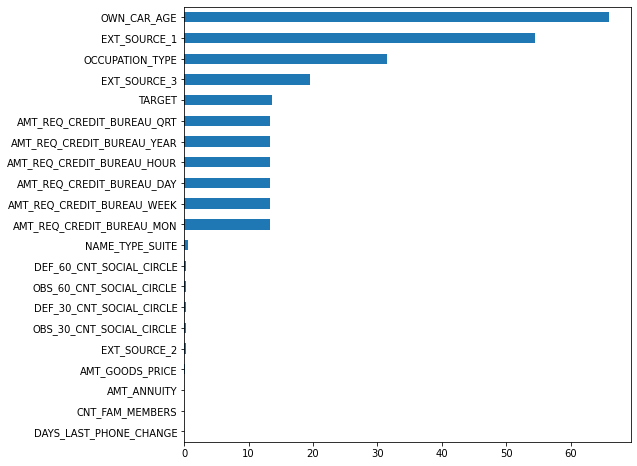

In [18]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in app.columns if app[i].isnull().any()]
percent_missing = app[nan_cols].isna().sum() * 100 / len(app)
plt.figure(figsize=(8, 8))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [20]:
#Finalement pour ext_source 1,2 et 3 on va imputer par la moyenne dans la mesure où les données sont déjà normalisées
#Et elles semblent un peu importantes
ext1=app['EXT_SOURCE_1'].mean()
ext2=app['EXT_SOURCE_2'].mean()
ext3=app['EXT_SOURCE_3'].mean()
app['EXT_SOURCE_1']=app['EXT_SOURCE_1'].fillna(ext1)
app['EXT_SOURCE_2']=app['EXT_SOURCE_2'].fillna(ext2)
app['EXT_SOURCE_3']=app['EXT_SOURCE_3'].fillna(ext3)
#Pour occupation type on créera un type: Unknown
app['OCCUPATION_TYPE']=app['OCCUPATION_TYPE'].fillna('Unknown')
#Beaucoup de demandes au credit bureau doit etre assez signe de mauvais présage, on va conserver en les ajoutants 
# et en mettant les nan a 0 car si rien ne revient du credit bureau c'est qu'il ne doit rien y avoir
app['AMT_REQ_CREDIT_BUREAU']=app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)+app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)\
                        +app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)+app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)+\
                        +app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)+app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
#On enlève les autres:
app.drop(['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',\
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1,inplace=True)
#NAME_TYPE_SUITE on vire
app.drop(['NAME_TYPE_SUITE'],axis=1,inplace=True)
#OBS et DEF ca a l'air d'avoir une influence minime, on va garder en imputant à 0 les valeurs manquantes car
#cela signifie aucune observation particulière
app['OBS_30_CNT_SOCIAL_CIRCLE']=app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
app['OBS_60_CNT_SOCIAL_CIRCLE']=app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
app['DEF_30_CNT_SOCIAL_CIRCLE']=app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
app['DEF_60_CNT_SOCIAL_CIRCLE']=app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)


<ipython-input-20-d02d7a40d592>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['EXT_SOURCE_1']=app['EXT_SOURCE_1'].fillna(ext1)
<ipython-input-20-d02d7a40d592>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['EXT_SOURCE_2']=app['EXT_SOURCE_2'].fillna(ext2)
<ipython-input-20-d02d7a40d592>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [21]:
ext1,ext2,ext3

(0.5019647173606232, 0.5148899751498301, 0.5093502021860536)

In [22]:
app.isnull().sum()

index                        0
SK_ID_CURR                   0
TARGET                   48744
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
                         ...  
FLAG_DOCUMENT_18             0
FLAG_DOCUMENT_19             0
FLAG_DOCUMENT_20             0
FLAG_DOCUMENT_21             0
AMT_REQ_CREDIT_BUREAU        0
Length: 70, dtype: int64

In [23]:
#Pour les documents 2 à 21 missing on va compter le nombre de documents absents:
app['Missing_docs']=app['FLAG_DOCUMENT_2']+app['FLAG_DOCUMENT_3']+app['FLAG_DOCUMENT_4']+app['FLAG_DOCUMENT_5']+\
                    app['FLAG_DOCUMENT_6']+app['FLAG_DOCUMENT_7']+app['FLAG_DOCUMENT_8']+app['FLAG_DOCUMENT_9']+\
                    app['FLAG_DOCUMENT_10']+app['FLAG_DOCUMENT_11']+app['FLAG_DOCUMENT_12']+app['FLAG_DOCUMENT_13']+\
                    app['FLAG_DOCUMENT_14']+app['FLAG_DOCUMENT_15']+app['FLAG_DOCUMENT_16']+app['FLAG_DOCUMENT_17']+\
                    app['FLAG_DOCUMENT_18']+app['FLAG_DOCUMENT_19']+app['FLAG_DOCUMENT_20']+app['FLAG_DOCUMENT_21']

<ipython-input-23-d0a25e99cd89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Missing_docs']=app['FLAG_DOCUMENT_2']+app['FLAG_DOCUMENT_3']+app['FLAG_DOCUMENT_4']+app['FLAG_DOCUMENT_5']+\


In [24]:
app.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',\
          'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',\
          'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',\
          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [27]:
app[app.OWN_CAR_AGE.isnull()][['FLAG_OWN_CAR','SK_ID_CURR']].groupby('FLAG_OWN_CAR').count()

,SK_ID_CURR
FLAG_OWN_CAR,
N,235235
Y,6


In [28]:
app.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [29]:
#Il n'y a donc que 5 personnes qui ont une voiture dont on ne connait pas l'àge sur ceux qui n'en ont pas on va
#donc pour celles-ci imputer la valeur moyenne des ages de ceux qui ont des voitures
#On va faire une colonne voiture:
#mettre 0 à ceux qui n'en ont pas et 1/(age+1) pour les autres:
moyenne_age_voiture=app['OWN_CAR_AGE'].mean()
def voiture(row):
    if row['FLAG_OWN_CAR']=='N':
        return 0
    elif row['OWN_CAR_AGE']!=row['OWN_CAR_AGE']:
        return 1/(moyenne_age_voiture+1)
    else:
        return 1/(row['OWN_CAR_AGE']+1)
    
app['Car']=app.apply(lambda x:voiture(x),axis=1)

<ipython-input-29-7d9018130a70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['Car']=app.apply(lambda x:voiture(x),axis=1)


In [30]:
app.drop(['FLAG_OWN_CAR','OWN_CAR_AGE'],axis=1,inplace=True)

/home/samuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


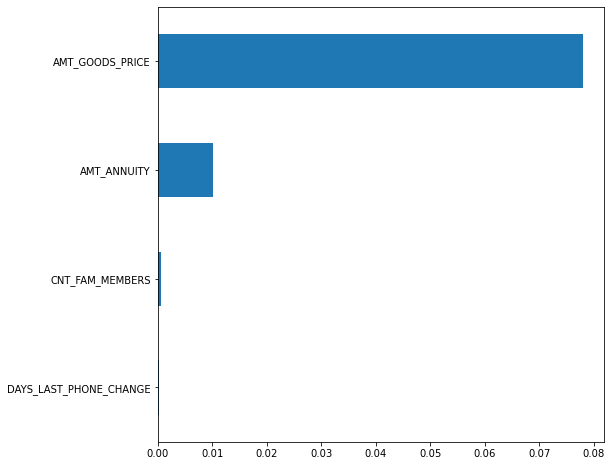

In [34]:
nan_cols = [i for i in app.columns if app[i].isnull().any() and i!='TARGET']
percent_missing = app[nan_cols].isna().sum() * 100 / len(app)
plt.figure(figsize=(8, 8))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [32]:
moyenne_famille=(app.CNT_FAM_MEMBERS-app.CNT_CHILDREN).mean()

In [33]:
#Pour les valeurs manquantes on va remplacer par cette valeur plus le nb d'enfants:
app['CNT_FAM_MEMBERS']=app.apply(lambda x:moyenne_famille+x['CNT_CHILDREN']\
                                 if x['CNT_FAM_MEMBERS']!=x['CNT_FAM_MEMBERS'] else x['CNT_FAM_MEMBERS'],axis=1)

<ipython-input-33-3b341b78ec0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['CNT_FAM_MEMBERS']=app.apply(lambda x:moyenne_famille+x['CNT_CHILDREN']\


In [35]:
#Pour AMT_GOODS_PRICES

In [39]:
#Pour amt annuity on fera un 3nn imputer à partir de income total, amt credit et cnt family members
from sklearn.impute import KNNImputer
knn3=KNNImputer(n_neighbors=3)
app[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']]=\
knn3.fit_transform(app[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']])

<ipython-input-39-1866c975e3a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']]=\
/home/samuel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [41]:
#On peu imaginer que le client n'a pas de portable donc on va imputer cette valeur avec le minimum de la colonne
#On va considérer que le client n'a jamais eu de portable
app['DAYS_LAST_PHONE_CHANGE']=app['DAYS_LAST_PHONE_CHANGE'].fillna(app['DAYS_LAST_PHONE_CHANGE'].min())

<ipython-input-41-cab2e2d8f6b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['DAYS_LAST_PHONE_CHANGE']=app['DAYS_LAST_PHONE_CHANGE'].fillna(app['DAYS_LAST_PHONE_CHANGE'].min())


In [42]:
#AMT_GOOD_PRICE est corrélé à 99% avec AMT CREDIT donc on va imputer la valeur du crédit pour les données manquantes
app['AMT_GOODS_PRICE']=app.apply(lambda x:x['AMT_CREDIT'] if x['AMT_GOODS_PRICE']!=x['AMT_GOODS_PRICE']\
                                else x['AMT_GOODS_PRICE'],axis=1)




<ipython-input-42-b39e77d5aa42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['AMT_GOODS_PRICE']=app.apply(lambda x:x['AMT_CREDIT'] if x['AMT_GOODS_PRICE']!=x['AMT_GOODS_PRICE']\


In [44]:
#Analyse des variables catégorielles:
categorical_columns = [col for col in app.columns if app[col].dtype == 'object']
for i in categorical_columns:
    print(i)
    print(app[i].unique().tolist())

NAME_CONTRACT_TYPE
['Cash loans', 'Revolving loans']
CODE_GENDER
['M', 'F', 'XNA']
FLAG_OWN_REALTY
['Y', 'N']
NAME_INCOME_TYPE
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
NAME_EDUCATION_TYPE
['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
NAME_FAMILY_STATUS
['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
NAME_HOUSING_TYPE
['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
OCCUPATION_TYPE
['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown', 'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff']
WEEKDAY_APPR_PROCESS_START
['WEDNESDAY', 

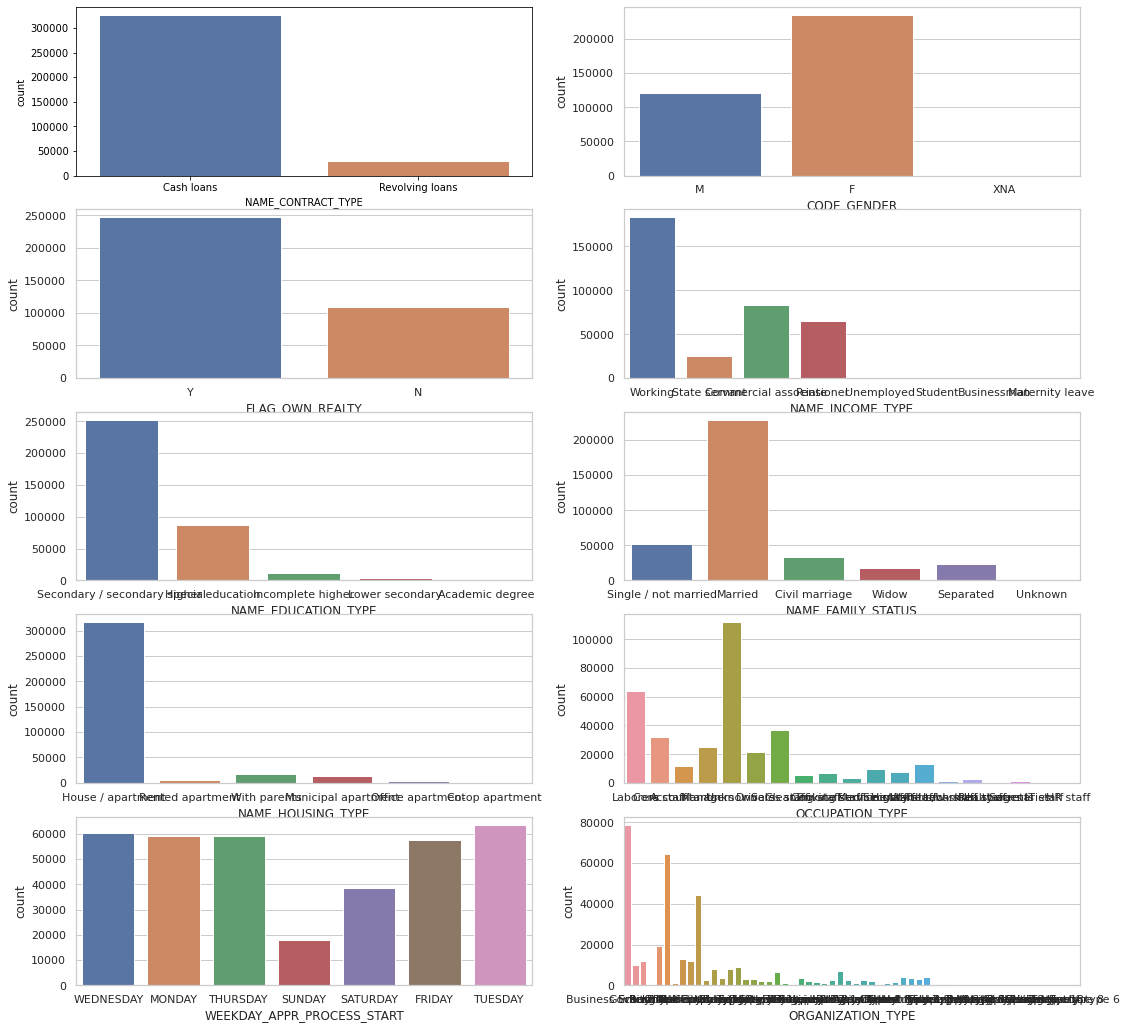

In [45]:
import seaborn as sns
plt.figure(figsize=(18,18))
k=1
for i in categorical_columns:
    
    plt.subplot(5,2,k)
    sns.set(style="whitegrid")
    sns.countplot(x=i,data=app)
    k+=1
    
plt.show()

In [46]:
#On fait des test ANOVA:
from scipy import stats
df=app.dropna(how='any',axis=0)
for i in categorical_columns:
    b_types=df[i].unique().tolist()
    print(b_types)
    d_data={b_type:df[['TARGET']][df[i]==b_type] for b_type in b_types}
    f,p=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
    print(i)
    print('f: ',f,'\t p value: ',p)

['Cash loans', 'Revolving loans']
NAME_CONTRACT_TYPE
f:  [293.81537547] 	 p value:  [7.86876534e-66]
['M', 'F', 'XNA']
CODE_GENDER
f:  [461.77388179] 	 p value:  [5.68463047e-201]
['Y', 'N']
FLAG_OWN_REALTY
f:  [11.62510113] 	 p value:  [0.00065076]
['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
NAME_INCOME_TYPE
f:  [179.7954789] 	 p value:  [5.44448689e-267]
['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
NAME_EDUCATION_TYPE
f:  [255.64646743] 	 p value:  [1.05869282e-219]
['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
NAME_FAMILY_STATUS
f:  [101.10277924] 	 p value:  [6.32570998e-107]
['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
NAME_HOUSING_TYPE
f:  [84.22478378] 	 p value:  [9.55653176e-89]
['Laborers', 'Core staff', 'Accountant

In [47]:
for i in categorical_columns:
    b_types=df[i].unique().tolist()
    print(app[[i,'TARGET']].groupby(i).agg(['mean','count']).sort_values(by=('TARGET','mean')))
    d_data={b_type:df[['TARGET']][df[i]==b_type] for b_type in b_types}
    f,p=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
    print('f: ',f,'\t p value: ',p)

                      TARGET        
                        mean   count
NAME_CONTRACT_TYPE                  
Revolving loans     0.054783   29279
Cash loans          0.083459  278232
f:  [293.81537547] 	 p value:  [7.86876534e-66]
               TARGET        
                 mean   count
CODE_GENDER                  
XNA          0.000000       4
F            0.069993  202448
M            0.101419  105059
f:  [461.77388179] 	 p value:  [5.68463047e-201]
                   TARGET        
                     mean   count
FLAG_OWN_REALTY                  
Y                0.079616  213312
N                0.083249   94199
f:  [11.62510113] 	 p value:  [0.00065076]
                        TARGET        
                          mean   count
NAME_INCOME_TYPE                      
Businessman           0.000000      10
Student               0.000000      18
Pensioner             0.053864   55362
State servant         0.057550   21703
Commercial associate  0.074843   71617
Working      

In [48]:
organization_type={}
L=[]
for i in app.ORGANIZATION_TYPE.unique():
    if len(app[app.ORGANIZATION_TYPE==i])<3000:
        organization_type[i]='Rare'
    else:
        L.append(i)

app['ORGANIZATION_TYPE']=app['ORGANIZATION_TYPE'].apply(lambda x: x if x in L else 'Rare')

<ipython-input-48-8fb2f0589f92>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['ORGANIZATION_TYPE']=app['ORGANIZATION_TYPE'].apply(lambda x: x if x in L else 'Rare')


In [49]:
#On crée des dictionnaire pour les catégories:
income={'Working':'Working','Commercial associate':'Commercial associate',\
           'Unemployed':'Rare', 'Student':'Rare', 'Businessman':'Rare',\
           'Maternity leave':'Rare','Pensioner':'State','State servant':'State'}
family={'Single / not married':'Other', 'Married':'Married', 'Civil marriage':'Other', 'Widow':'Widow',
       'Separated':'Separated', 'Unknown':'Unknown'}
housing={'House / apartment':'Other', 'Rented apartment':'Rented or with parents', 'With parents':'Rented or with parents',
       'Municipal apartment':'Municipal', 'Office apartment':'Office', 'Co-op apartment':'Other'}
occupation={'Laborers':'Middle_skill', 'Core staff':'Skilled', 'Accountants':'Accountant',\
             'Managers':'Skilled', 'Unknown':'Unknown','Drivers':'Middle_skill', 'Sales staff':'Middle_skill',\
             'Cleaning staff':'Middle_skill', 'Cooking staff':'Middle_skill','Private service staff':'Skilled',\
             'Medicine staff':'Skilled', 'Security staff':'Middle_skill','High skill tech staff':'Skilled',\
             'Waiters/barmen staff':'Middle_skill','Low-skill Laborers':'Low_skilled',\
             'Realty agents':'Skilled', 'Secretaries':'Skilled', 'IT staff':'Skilled','HR staff':'Skilled'}
education={'Secondary / secondary special':2, 'Higher education':4,'Incomplete higher':3, 'Lower secondary':1,\
           'Academic degree':5}
for i in ['Security','Self-employed','Trade: type 3','Industry: type 3','Construction']:
    organization_type[i]='Risky'
for i in ['Housing','Business Entity Type 2','Business Entity Type 1','Industry: type 11','Transport: type 4','Trade: type 7','Business Entity Type 3']:
    organization_type[i]='Medium'
for i in ['School','Government', 'Medicine', 'Kindergarten','Industry: type 9']:
    organization_type[i]='Low'
for i in ['XNA','Military']:
    organization_type[i]='Less'
organization_type['Other']='Rare'
organization_type['Rare']='Rare'

In [50]:
app['ORGANIZATION_TYPE']=app['ORGANIZATION_TYPE'].apply(lambda x: organization_type[x])
app['NAME_EDUCATION_TYPE']=app['NAME_EDUCATION_TYPE'].apply(lambda x: education[x])
app['NAME_FAMILY_STATUS']=app['NAME_FAMILY_STATUS'].apply(lambda x: family[x])
app['NAME_HOUSING_TYPE']=app['NAME_HOUSING_TYPE'].apply(lambda x: housing[x])
app['NAME_INCOME_TYPE']=app['NAME_INCOME_TYPE'].apply(lambda x: income[x])
app['OCCUPATION_TYPE']=app['OCCUPATION_TYPE'].apply(lambda x: occupation[x])

<ipython-input-50-66c093ef880a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['ORGANIZATION_TYPE']=app['ORGANIZATION_TYPE'].apply(lambda x: organization_type[x])
<ipython-input-50-66c093ef880a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['NAME_EDUCATION_TYPE']=app['NAME_EDUCATION_TYPE'].apply(lambda x: education[x])
<ipython-input-50-66c093ef880a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [51]:
for i in categorical_columns:
    b_types=df[i].unique().tolist()
    print(app[[i,'TARGET']].groupby(i).agg(['mean','count']).sort_values(by=('TARGET','mean')))
    d_data={b_type:df[['TARGET']][df[i]==b_type] for b_type in b_types}
    f,p=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
    print('f: ',f,'\t p value: ',p)

                      TARGET        
                        mean   count
NAME_CONTRACT_TYPE                  
Revolving loans     0.054783   29279
Cash loans          0.083459  278232
f:  [293.81537547] 	 p value:  [7.86876534e-66]
               TARGET        
                 mean   count
CODE_GENDER                  
XNA          0.000000       4
F            0.069993  202448
M            0.101419  105059
f:  [461.77388179] 	 p value:  [5.68463047e-201]
                   TARGET        
                     mean   count
FLAG_OWN_REALTY                  
Y                0.079616  213312
N                0.083249   94199
f:  [11.62510113] 	 p value:  [0.00065076]
                        TARGET        
                          mean   count
NAME_INCOME_TYPE                      
State                 0.054902   77065
Commercial associate  0.074843   71617
Working               0.095885  158774
Rare                  0.181818      55
f:  [179.7954789] 	 p value:  [5.44448689e-267]
    

In [52]:
app.NAME_EDUCATION_TYPE.unique()

array([2, 4, 3, 1, 5])

In [53]:
df=app.dropna(how='any',axis=0)
for i in categorical_columns:
    b_types=df[i].unique().tolist()
    print(app[[i,'TARGET']].groupby(i).agg(['mean','count']).sort_values(by=('TARGET','mean')))
    d_data={b_type:df[['TARGET']][df[i]==b_type] for b_type in b_types}
    f,p=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
    print('f: ',f,'\t p value: ',p)

                      TARGET        
                        mean   count
NAME_CONTRACT_TYPE                  
Revolving loans     0.054783   29279
Cash loans          0.083459  278232
f:  [293.81537547] 	 p value:  [7.86876534e-66]
               TARGET        
                 mean   count
CODE_GENDER                  
XNA          0.000000       4
F            0.069993  202448
M            0.101419  105059
f:  [461.77388179] 	 p value:  [5.68463047e-201]
                   TARGET        
                     mean   count
FLAG_OWN_REALTY                  
Y                0.079616  213312
N                0.083249   94199
f:  [11.62510113] 	 p value:  [0.00065076]
                        TARGET        
                          mean   count
NAME_INCOME_TYPE                      
State                 0.054902   77065
Commercial associate  0.074843   71617
Working               0.095885  158774
Rare                  0.181818      55
f:  [410.00700689] 	 p value:  [7.64681016e-266]
   

In [54]:
organization_type

{'Religion': 'Rare',
 'Electricity': 'Rare',
 'Transport: type 2': 'Rare',
 'Services': 'Rare',
 'Security Ministries': 'Rare',
 'Industry: type 1': 'Rare',
 'Emergency': 'Rare',
 'Trade: type 2': 'Rare',
 'University': 'Rare',
 'Transport: type 3': 'Rare',
 'Police': 'Rare',
 'Postal': 'Rare',
 'Industry: type 4': 'Rare',
 'Agriculture': 'Rare',
 'Restaurant': 'Rare',
 'Culture': 'Rare',
 'Hotel': 'Rare',
 'Industry: type 7': 'Rare',
 'Bank': 'Rare',
 'Insurance': 'Rare',
 'Trade: type 6': 'Rare',
 'Industry: type 2': 'Rare',
 'Transport: type 1': 'Rare',
 'Industry: type 12': 'Rare',
 'Mobile': 'Rare',
 'Trade: type 1': 'Rare',
 'Industry: type 5': 'Rare',
 'Industry: type 10': 'Rare',
 'Legal Services': 'Rare',
 'Advertising': 'Rare',
 'Trade: type 5': 'Rare',
 'Cleaning': 'Rare',
 'Industry: type 13': 'Rare',
 'Trade: type 4': 'Rare',
 'Telecom': 'Rare',
 'Industry: type 8': 'Rare',
 'Realtor': 'Rare',
 'Industry: type 6': 'Rare',
 'Security': 'Risky',
 'Self-employed': 'Risky',
 '

In [55]:
#On supprime:
#WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
#Les dernières sont fortement corrélées avec les 30
#Les deux premiers n'ont aucune importance
#On crée une catégorie flag_com en ajoutant tous les flag_mobile, phone et email
#On crée une catégorie flag living en ajoutant toutes les catégorie flag city et région:
app['FLAG_COMM']=app['FLAG_MOBIL']+app['FLAG_EMP_PHONE']+app['FLAG_WORK_PHONE']+app['FLAG_CONT_MOBILE']\
+app['FLAG_PHONE']+app['FLAG_EMAIL']
app.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'\
         ],axis=1,inplace=True)

<ipython-input-55-983e18e98e61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['FLAG_COMM']=app['FLAG_MOBIL']+app['FLAG_EMP_PHONE']+app['FLAG_WORK_PHONE']+app['FLAG_CONT_MOBILE']\
/home/samuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
app['FLAG_LIVING']=app['REG_REGION_NOT_LIVE_REGION']+app['REG_REGION_NOT_WORK_REGION']+app['LIVE_REGION_NOT_WORK_REGION']\
                    +app['REG_CITY_NOT_LIVE_CITY']+app['REG_CITY_NOT_WORK_CITY']+app['LIVE_CITY_NOT_WORK_CITY']
app.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)


<ipython-input-56-87ddd2ec4bcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app['FLAG_LIVING']=app['REG_REGION_NOT_LIVE_REGION']+app['REG_REGION_NOT_WORK_REGION']+app['LIVE_REGION_NOT_WORK_REGION']\


In [57]:
app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

In [58]:
app.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [59]:
app

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU,Missing_docs,Car,FLAG_COMM,FLAG_LIVING
0,0,100002,1.0,Cash loans,M,Y,0,202500.0,406597.5,24700.5,...,0.262949,0.139376,2.0,2.0,-1134.0,1.0,1,0.000000,4,0
1,1,100003,0.0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,0.622246,0.509350,1.0,0.0,-828.0,0.0,1,0.000000,4,0
2,2,100004,0.0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,0.0,0.0,-815.0,0.0,0,0.037037,5,0
3,3,100006,0.0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,...,0.650442,0.509350,2.0,0.0,-617.0,0.0,1,0.000000,3,0
4,4,100007,0.0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,...,0.322738,0.509350,0.0,0.0,-1106.0,0.0,1,0.000000,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,48739,456221,NaN,Cash loans,F,Y,0,121500.0,412560.0,17473.5,...,0.648575,0.643026,1.0,0.0,-684.0,1.0,1,0.000000,5,0
356251,48740,456222,NaN,Cash loans,F,N,2,157500.0,622413.0,31909.5,...,0.684596,0.509350,2.0,0.0,0.0,0.0,1,0.000000,3,2
356252,48741,456223,NaN,Cash loans,F,Y,1,202500.0,315000.0,33205.5,...,0.632770,0.283712,0.0,0.0,-838.0,4.0,1,0.200000,4,0
356253,48742,456224,NaN,Cash loans,M,N,0,225000.0,450000.0,25128.0,...,0.445701,0.595456,0.0,0.0,-2308.0,2.0,1,0.000000,5,4


In [60]:
df=homecredits[homecredits.Table=='application_{train|test}.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in app.columns.tolist():
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample
TARGET  :  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE  :  Identification if loan is cash or revolving
CODE_GENDER  :  Gender of the client
FLAG_OWN_REALTY  :  Flag if client owns a house or flat
CNT_CHILDREN  :  Number of children the client has
AMT_INCOME_TOTAL  :  Income of the client
AMT_CREDIT  :  Credit amount of the loan
AMT_ANNUITY  :  Loan annuity
AMT_GOODS_PRICE  :  For consumer loans it is the price of the goods for which the loan is given
NAME_INCOME_TYPE  :  Clients income type (businessman, working, maternity leave,…)
NAME_EDUCATION_TYPE  :  Level of highes

In [62]:
num_columns = [col for col in app.columns if app[col].dtype != 'object']
print(len(num_columns))

28


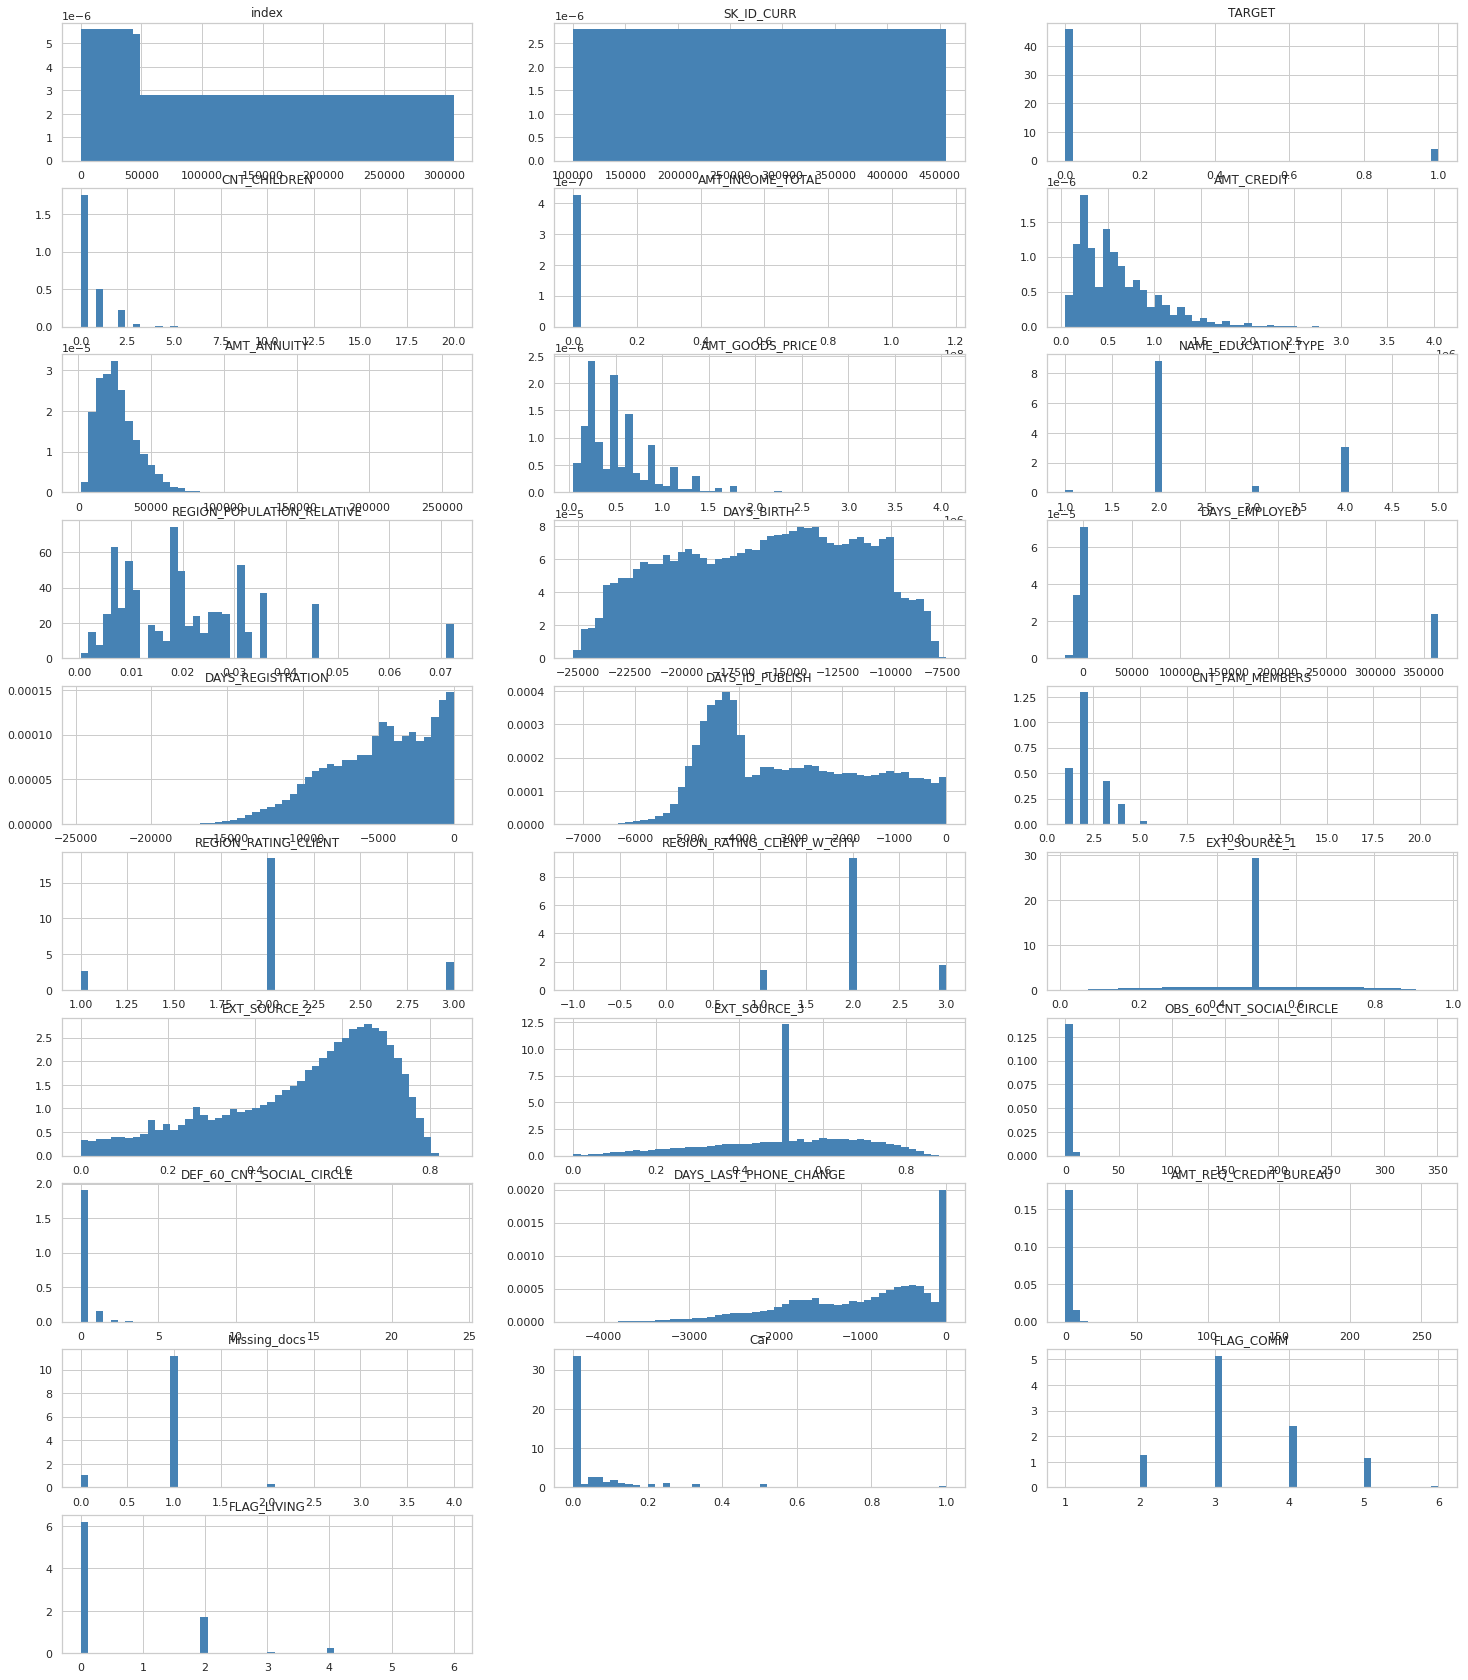

In [63]:
#Maintenant on va regarder les outliers pour les variables chiffrées:


fig = plt.figure(figsize=(25, 30))
k=1
for i in num_columns:
    plt.subplot(10,3,k)
    plt.hist(app[i], bins=50, color='steelblue', density=True, edgecolor='none')
    plt.title(i)
    k+=1
plt.show()

In [64]:
outliers_col=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED',\
 'CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU']
len(outliers_col)

10

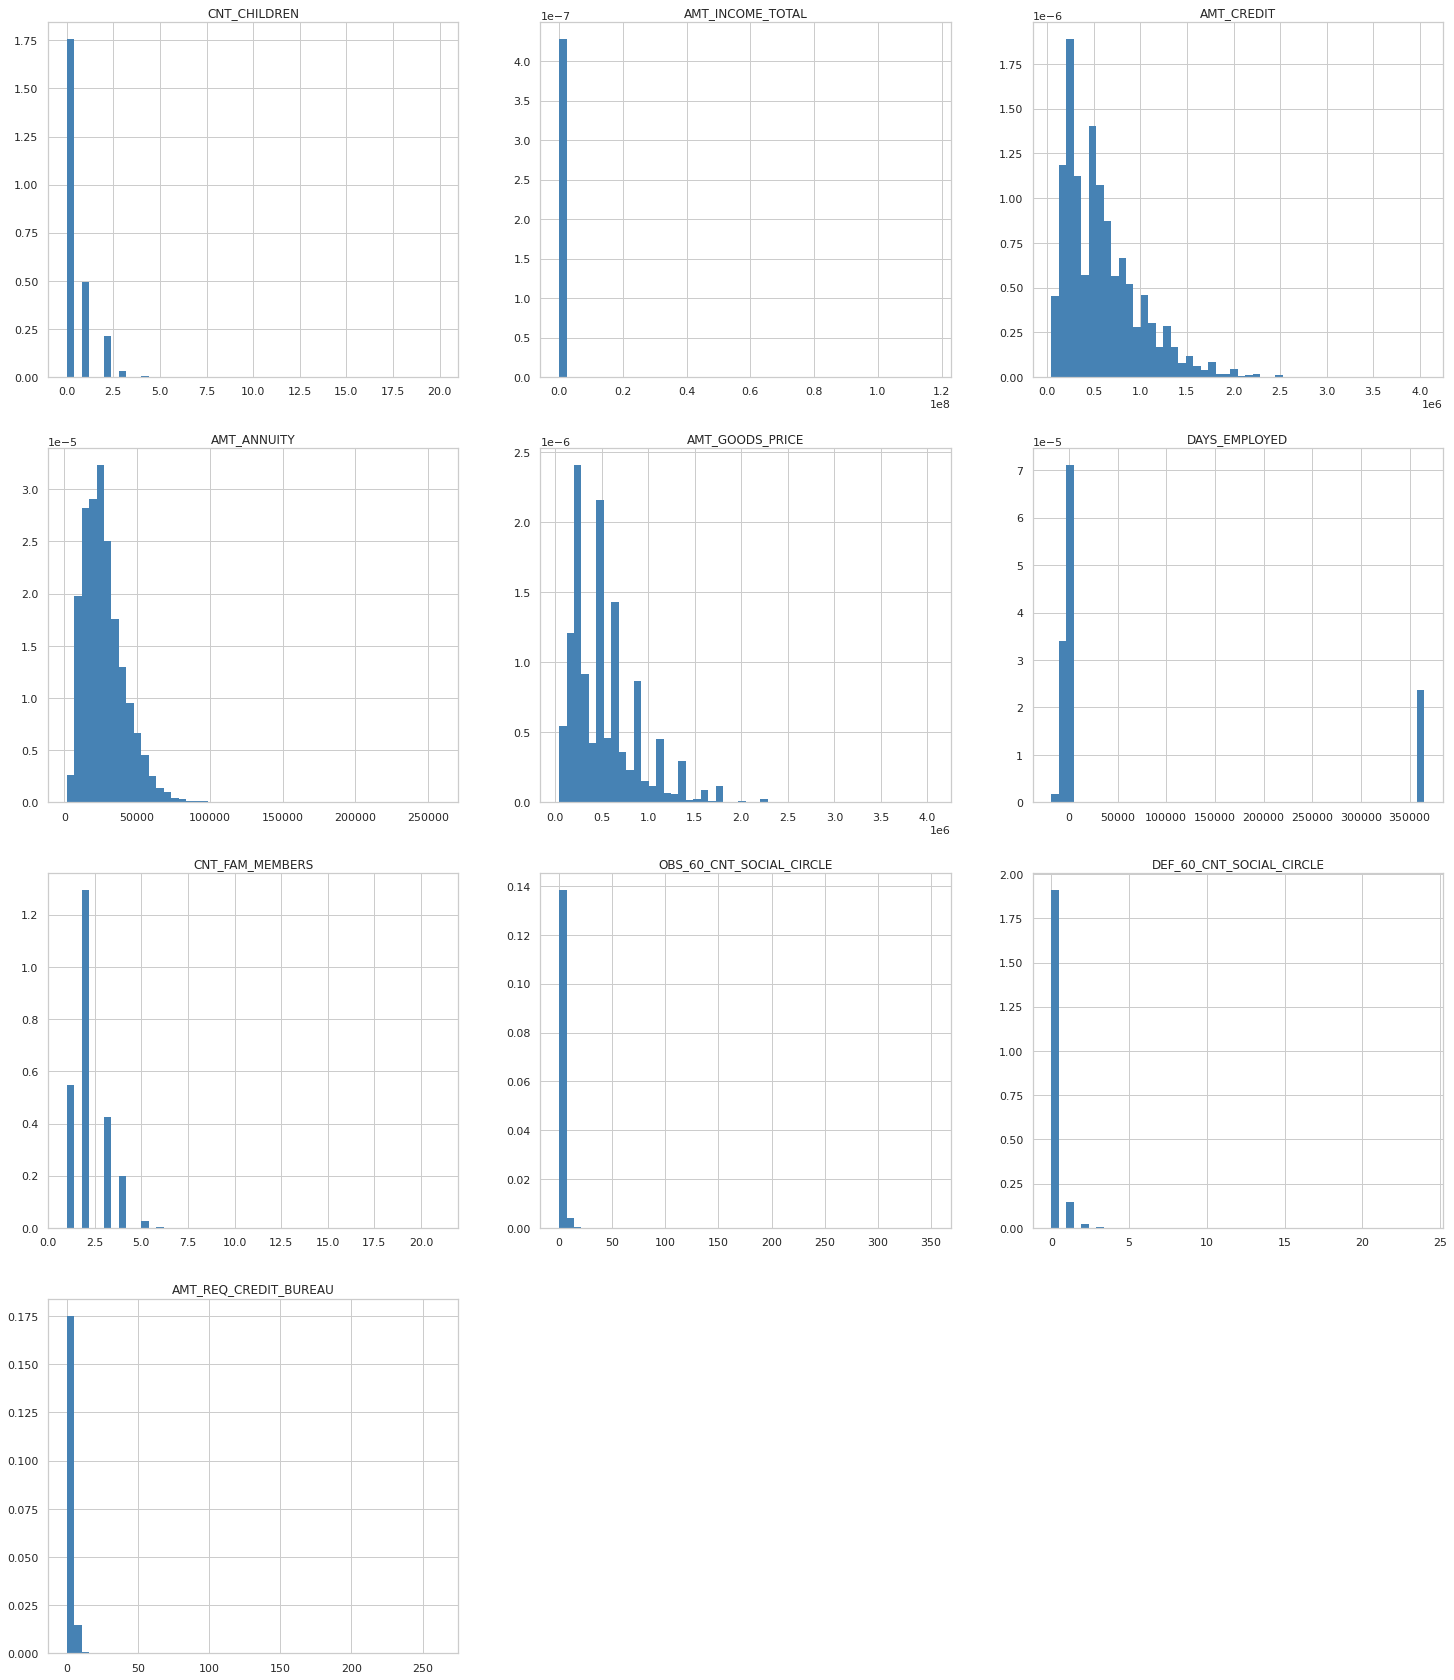

In [65]:
fig = plt.figure(figsize=(25, 30))
k=1
for i in outliers_col:
    plt.subplot(4,3,k)
    plt.hist(app[i], bins=50, color='steelblue', density=True, edgecolor='none')
    plt.title(i)
    k+=1
plt.show()

In [66]:
outliers={'CNT_CHILDREN':[0,6],'AMT_INCOME_TOTAL':[0,1000000],'AMT_CREDIT':[0,3000000],\
          'AMT_ANNUITY':[0,120000],'AMT_GOODS_PRICE':[0,3500000],'CNT_FAM_MEMBERS':[0,8],\
          'OBS_60_CNT_SOCIAL_CIRCLE':[0,15],'DEF_60_CNT_SOCIAL_CIRCLE':[0,5],'AMT_REQ_CREDIT_BUREAU':[0,15]}
df=app.copy()
print(len(df))
for i in outliers.keys():
    df=df[-(df[i]>outliers[i][1])]
    df=df[-(df[i]<outliers[i][0])]
    print(len(df))

356255
356227
355939
355910
355686
355686
355686
355189
355186
354988


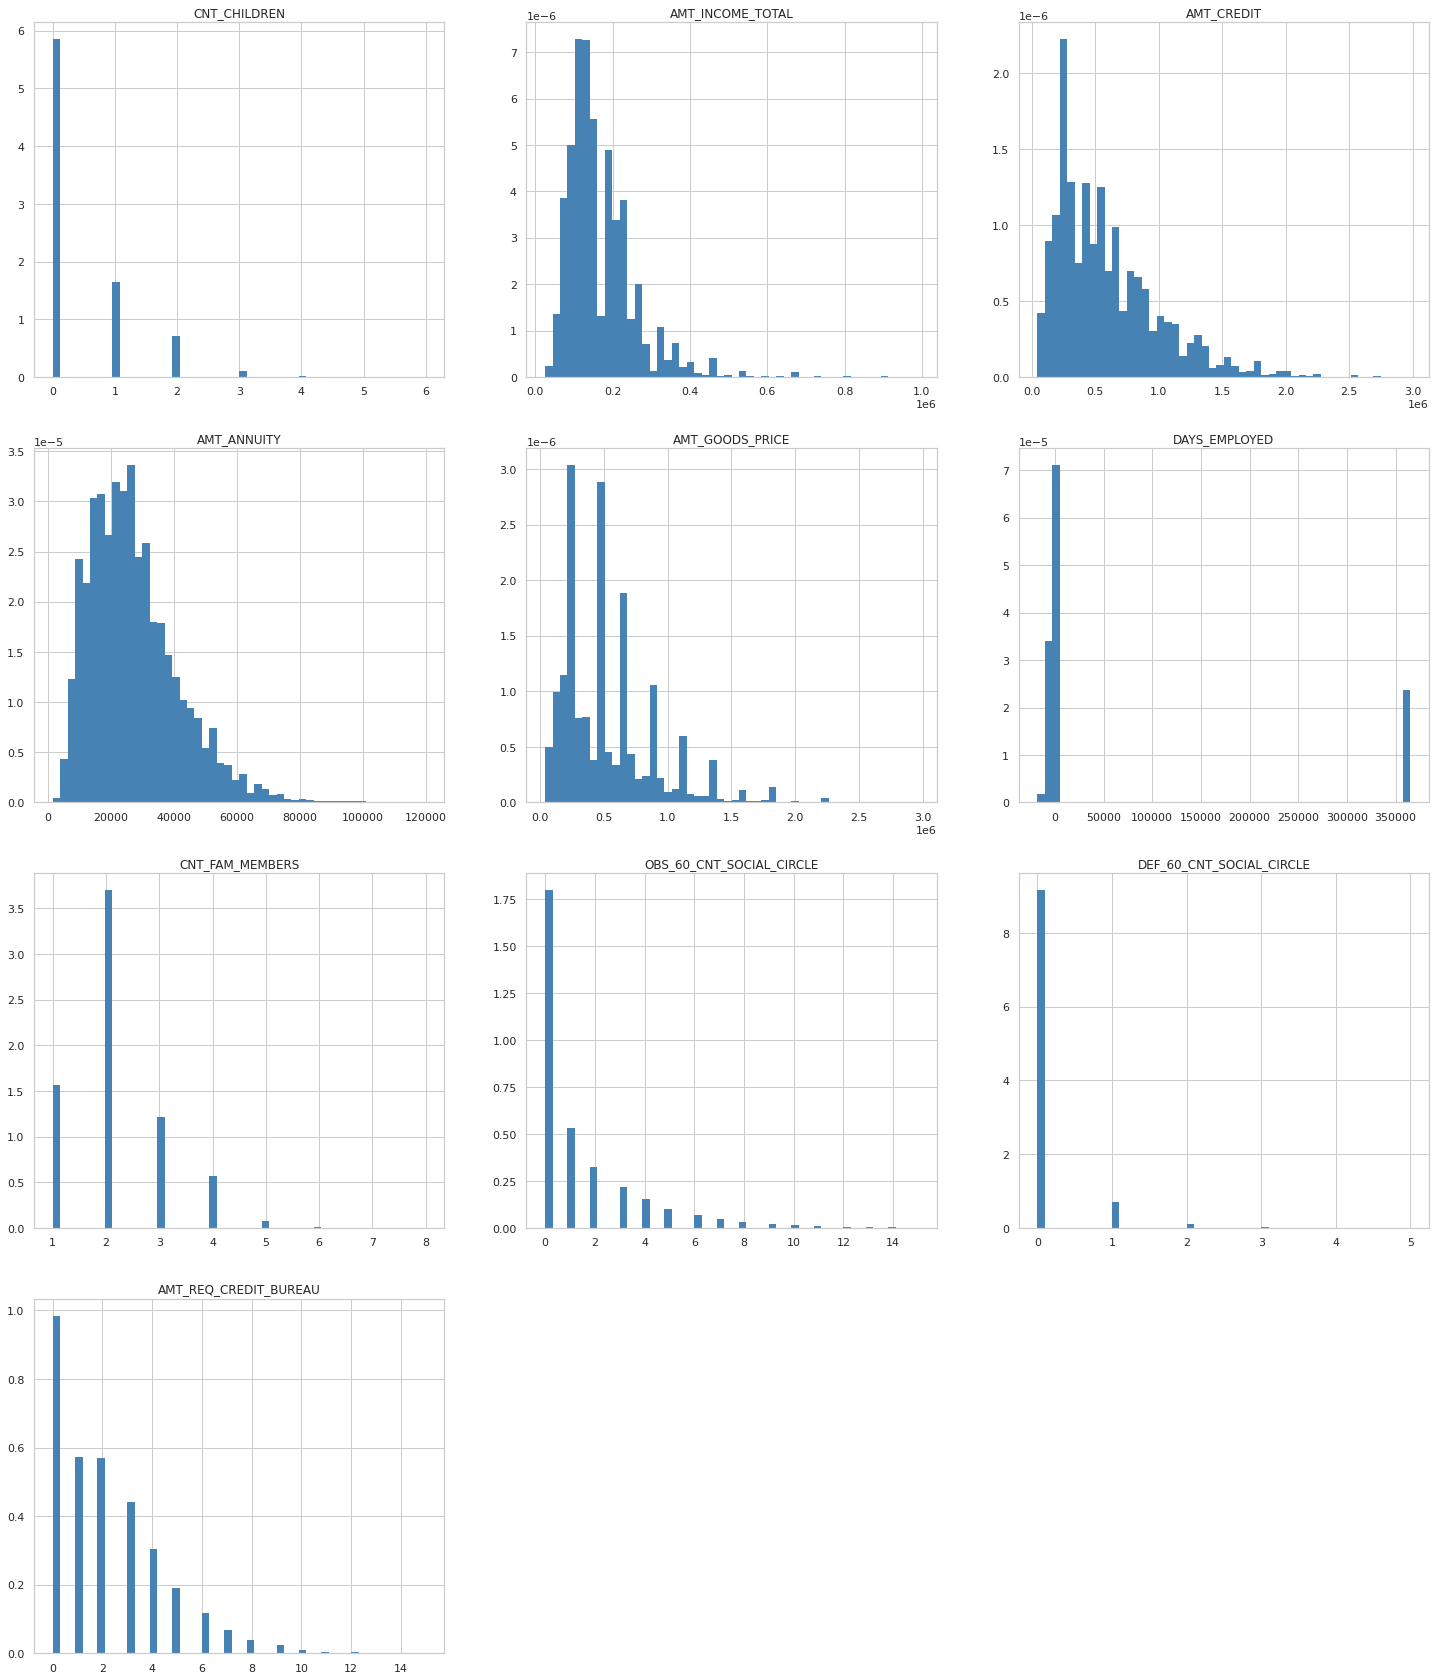

In [67]:
fig = plt.figure(figsize=(25, 30))
k=1
for i in outliers_col:
    plt.subplot(4,3,k)
    plt.hist(df[i], bins=50, color='steelblue', density=True, edgecolor='none')
    plt.title(i)
    k+=1
plt.show()

In [68]:
pb=app[app.DAYS_EMPLOYED>0][['DAYS_EMPLOYED','OCCUPATION_TYPE','ORGANIZATION_TYPE']]

In [69]:
pb.groupby(['OCCUPATION_TYPE','ORGANIZATION_TYPE']).count()

,,DAYS_EMPLOYED
OCCUPATION_TYPE,ORGANIZATION_TYPE,
Middle_skill,Less,2
Unknown,Less,64646


In [74]:
pb.DAYS_EMPLOYED.unique()

array([365243])

In [77]:
#On remarque que quasiment tous les days employed sont dans la catégorie Unknown.
#Par ailleurs les taux d'obtentions des prets sont supérieur à la moyenne:
#0.065 contre 0.08
#On décide donc d'imputer la valeur moyenne pour ces personnes
app[-(app.DAYS_EMPLOYED>0)]

-2396.6989372683097

In [70]:
test2=app[['DAYS_EMPLOYED','OCCUPATION_TYPE','ORGANIZATION_TYPE']]

In [71]:
test2

,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,-637,Middle_skill,Medium
1,-1188,Skilled,Low
2,-225,Middle_skill,Low
3,-3039,Middle_skill,Medium
4,-3038,Skilled,Rare
...,...,...,...
356250,-5169,Unknown,Rare
356251,-1149,Middle_skill,Medium
356252,-3037,Unknown,Medium
356253,-2731,Skilled,Risky


In [72]:
original_columns = list(test2.columns)
categorical_columns = [col for col in test2.columns if test2[col].dtype == 'object']
test2 = pd.get_dummies(test2, columns=categorical_columns)
test2

,DAYS_EMPLOYED,OCCUPATION_TYPE_Accountant,OCCUPATION_TYPE_Low_skilled,OCCUPATION_TYPE_Middle_skill,OCCUPATION_TYPE_Skilled,OCCUPATION_TYPE_Unknown,ORGANIZATION_TYPE_Less,ORGANIZATION_TYPE_Low,ORGANIZATION_TYPE_Medium,ORGANIZATION_TYPE_Rare,ORGANIZATION_TYPE_Risky
0,-637,0,0,1,0,0,0,0,1,0,0
1,-1188,0,0,0,1,0,0,1,0,0,0
2,-225,0,0,1,0,0,0,1,0,0,0
3,-3039,0,0,1,0,0,0,0,1,0,0
4,-3038,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
356250,-5169,0,0,0,0,1,0,0,0,1,0
356251,-1149,0,0,1,0,0,0,0,1,0,0
356252,-3037,0,0,0,0,1,0,0,1,0,0
356253,-2731,0,0,0,1,0,0,0,0,0,1


<a id="section1.2"> </a>
# B/ Features extraction

In [26]:
from sklearn.impute import KNNImputer

moyenne_age_voiture=12
#Petite fonction pour traiter les variables voiture
def voiture(row):
        if row['FLAG_OWN_CAR']=='N':
            return 0
        elif row['OWN_CAR_AGE']!=row['OWN_CAR_AGE']:
            return 1/(moyenne_age_voiture+1)
        else:
            return 1/(row['OWN_CAR_AGE']+1)
    

def application(df2,train=True):
    """
    Loads application train dataset.
    Fill nan values
    Remove outliers
    Meanwhile and afterwards, feature engineering steps are implemented.
    Returns dataframe with feature engineering including new implemented features.
    """
    
    
    drop_feat=['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',\
               'DEF_30_CNT_SOCIAL_CIRCLE',\
               'APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG',\
             'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',\
             'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',\
     'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE',\
     'FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',\
     'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',\
     'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',\
     'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',\
     'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',\
     'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
    
    #############################On enlève les colonnes qui ne servent pas#####################################
    df=df2.drop(drop_feat,axis=1)
    
    ##################################Imputation des valeurs manquantes########################################
    #Pour EXT_SOURCE on prend la moyenne
    ext1=0.502
    ext2=0.515
    ext3=0.509
    df['EXT_SOURCE_1']=df['EXT_SOURCE_1'].fillna(ext1)
    df['EXT_SOURCE_2']=df['EXT_SOURCE_2'].fillna(ext2)
    df['EXT_SOURCE_3']=df['EXT_SOURCE_3'].fillna(ext3)
    #Pour occupation type on crée un type: Unknown
    df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Unknown')
    #Beaucoup de demandes au credit bureau doit etre assez signe de mauvais présage, on va conserver en les ajoutants 
    # et en mettant les nan a 0 car si rien ne revient du credit bureau c'est qu'il ne doit rien y avoir
    df['AMT_REQ_CREDIT_BUREAU']=df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)+df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)\
                        +df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)+df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)+\
                        +df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)+df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
    #On enlève les autres:
    df.drop(['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',\
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'],axis=1,inplace=True)
    #OBS et DEF ont l'air d'avoir une influence minime, on va garder en imputant à 0 les valeurs manquantes car
    #cela signifie aucune observation particulière et on garde que le 60
    df['OBS_60_CNT_SOCIAL_CIRCLE']=df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
    df['DEF_60_CNT_SOCIAL_CIRCLE']=df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)
    #CNT_FAM_MEMBERS on calcule la moyenne de la taille des ménage sans enfant (CNT_FAM-CNT_CHILD):1.7 et on y ajoute
    #Le nombre d'enfants
    df['CNT_FAM_MEMBERS']=df.apply(lambda x:1.7+x['CNT_CHILDREN']\
                                 if x['CNT_FAM_MEMBERS']!=x['CNT_FAM_MEMBERS'] else x['CNT_FAM_MEMBERS'],axis=1)
    #AMT_GOOD_PRICE est corrélé à 99% avec AMT CREDIT donc on va imputer la valeur du crédit pour les données manquantes
    df['AMT_GOODS_PRICE']=df.apply(lambda x:x['AMT_CREDIT'] if x['AMT_GOODS_PRICE']!=x['AMT_GOODS_PRICE']\
                                else x['AMT_GOODS_PRICE'],axis=1)
    #Pour amt annuity on fera un 3nn imputer à partir de income total, amt credit et cnt family members
    knn3=KNNImputer(n_neighbors=3)
    df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']]=\
    knn3.fit_transform(df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']])
    #On peu imaginer que le client n'a pas de portable donc on va imputer cette valeur avec le minimum de la colonne
    #On va considérer que le client n'a jamais eu de portable et on lui impute la valeur minimale (n'a jamais changé)
    df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].min())
    
    #Traitement des valeurs extrèmes pour DAYS_WORKED on remplace par la valeur moyenne: -2396
    df['DAYS_EMPLOYED'].replace(365243, -2400, inplace=True)
    
    ###############################Traitement des outliers pour train seulement###############################
    if train:
        #Variables catégorielles:
        #On supprime les XNA dans gender pour n'avoir plus que M and F:
        df=df[df['CODE_GENDER']!='XNA']
    
        #Variables numériques
        outliers={'CNT_CHILDREN':[0,6],'AMT_INCOME_TOTAL':[0,1000000],'AMT_CREDIT':[0,3000000],\
              'AMT_ANNUITY':[0,120000],'AMT_GOODS_PRICE':[0,3500000],'CNT_FAM_MEMBERS':[0,8],\
              'OBS_60_CNT_SOCIAL_CIRCLE':[0,15],'DEF_60_CNT_SOCIAL_CIRCLE':[0,5],'AMT_REQ_CREDIT_BUREAU':[0,15]}
        for i in outliers.keys():
            df=df[-(df[i]>outliers[i][1])]
            df=df[-(df[i]<outliers[i][0])]
    
    
    #######################################Traitement des flags##############################################
    df['FLAG_LIVING']=df['REG_REGION_NOT_LIVE_REGION']+df['REG_REGION_NOT_WORK_REGION']+df['LIVE_REGION_NOT_WORK_REGION']\
                    +df['REG_CITY_NOT_LIVE_CITY']+df['REG_CITY_NOT_WORK_CITY']+df['LIVE_CITY_NOT_WORK_CITY']
    
    df.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)
    
    df['FLAG_COMM']=df['FLAG_MOBIL']+df['FLAG_EMP_PHONE']+df['FLAG_WORK_PHONE']+df['FLAG_CONT_MOBILE']\
    +df['FLAG_PHONE']+df['FLAG_EMAIL']
    
    df.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'\
         ],axis=1,inplace=True)
    
    df['Missing_docs']=df['FLAG_DOCUMENT_2']+df['FLAG_DOCUMENT_3']+df['FLAG_DOCUMENT_4']+df['FLAG_DOCUMENT_5']+\
                    df['FLAG_DOCUMENT_6']+df['FLAG_DOCUMENT_7']+df['FLAG_DOCUMENT_8']+df['FLAG_DOCUMENT_9']+\
                    df['FLAG_DOCUMENT_10']+df['FLAG_DOCUMENT_11']+df['FLAG_DOCUMENT_12']+df['FLAG_DOCUMENT_13']+\
                    df['FLAG_DOCUMENT_14']+df['FLAG_DOCUMENT_15']+df['FLAG_DOCUMENT_16']+df['FLAG_DOCUMENT_17']+\
                    df['FLAG_DOCUMENT_18']+df['FLAG_DOCUMENT_19']+df['FLAG_DOCUMENT_20']+df['FLAG_DOCUMENT_21']
    
    df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',\
          'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',\
          'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',\
          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)
    
    #################################Traitement des deux colonnes Cars########################################
    #Si il n'y a pas de voitures on prend 0 sinon on prend 1/année véhicule avec une imputation des valeurs
    #manquantes des items avec voitures à la moyenne c'est à dire 12:
    df['Car']=df.apply(lambda x:voiture(x),axis=1)
    df.drop(['FLAG_OWN_CAR','OWN_CAR_AGE'],axis=1,inplace=True)
    
    ##################################Traitement des variables catégorielles###################################
    
    #NAME_CONTRACT_TYPE codée en 0 ou 1: 0 pour Revolving loans et 1 pour cash loans
    df['NAME_CONTRACT_TYPE']=df['NAME_CONTRACT_TYPE'].apply(lambda x:1 if x=='Cash loans' else 0)
    #CODE_GENDER codée en 0 ou 1: 0 pour M et 1 pour F
    df['CODE_GENDER']=df['CODE_GENDER'].apply(lambda x:1 if x=='F' else 0)
    #FLAG_OWN_REALTY codée en 0 ou 1: 0 pour N et 1 pour Y
    df['FLAG_OWN_REALTY']=df['FLAG_OWN_REALTY'].apply(lambda x:1 if x=='Y' else 0)
    #Pour NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS,NAME_HOUSING_TYPE, OCCUPATION_TYPE et 
    #ORGANIZATION_TYPE on réduit le nombre de catégorie avec les dictionnaires suivants:
    income={'Working':'Working','Commercial associate':'Commercial associate',\
           'Unemployed':'Rare', 'Student':'Rare', 'Businessman':'Rare',\
           'Maternity leave':'Rare','Pensioner':'State','State servant':'State'}
    family={'Single / not married':'Other', 'Married':'Married', 'Civil marriage':'Other', 'Widow':'Widow',
       'Separated':'Separated', 'Unknown':'Unknown'}
    housing={'House / apartment':'Other', 'Rented apartment':'Rented or with parents', 'With parents':'Rented or with parents',
           'Municipal apartment':'Municipal', 'Office apartment':'Office', 'Co-op apartment':'Other'}
    occupation={'Laborers':'Middle_skill', 'Core staff':'Skilled', 'Accountants':'Accountant',\
             'Managers':'Skilled', 'Unknown':'Unknown','Drivers':'Middle_skill', 'Sales staff':'Middle_skill',\
             'Cleaning staff':'Middle_skill', 'Cooking staff':'Middle_skill','Private service staff':'Skilled',\
             'Medicine staff':'Skilled', 'Security staff':'Middle_skill','High skill tech staff':'Skilled',\
             'Waiters/barmen staff':'Middle_skill','Low-skill Laborers':'Low_skilled',\
             'Realty agents':'Skilled', 'Secretaries':'Skilled', 'IT staff':'Skilled','HR staff':'Skilled'}
    education={'Secondary / secondary special':2, 'Higher education':4,'Incomplete higher':3, 'Lower secondary':1,\
           'Academic degree':5}
    organization_type={'Security': 'Risky','Self-employed': 'Risky', 'Trade: type 3': 'Risky',\
                       'Industry: type 3': 'Risky','Construction': 'Risky','Housing': 'Medium',\
                       'Business Entity Type 2': 'Medium','Business Entity Type 1': 'Medium',\
                       'Industry: type 11': 'Medium','Transport: type 4': 'Medium', 'Trade: type 7': 'Medium',\
                       'Business Entity Type 3': 'Medium','School': 'Low','Government': 'Low','Medicine': 'Low',\
                       'Kindergarten': 'Low','Industry: type 9': 'Low','XNA': 'Less','Military': 'Less',\
                       'Other': 'Rare'}
    df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].apply(lambda x: education[x])
    df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].apply(lambda x: family[x])
    df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].apply(lambda x: housing[x])
    df['NAME_INCOME_TYPE']=df['NAME_INCOME_TYPE'].apply(lambda x: income[x])
    df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].apply(lambda x: occupation[x])
    L=list(organization_type.keys())
    df['ORGANIZATION_TYPE']=df['ORGANIZATION_TYPE'].apply(lambda x: 'Rare' if x not in L else organization_type[x])
    
    #One Hot encoding des données catégorielles:
    original_columns = list(df.columns)
    categorical_columns = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
    df = pd.get_dummies(df, columns=categorical_columns)
    
    ####################################Création de nouvelles features###########################################
    df['INCOME_CREDIT_%'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_%'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    df['LOAN_VALUE_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['ANNUITY_INCOME_PER_PERSON%'] = df['INCOME_PER_PERSON'] / df['AMT_ANNUITY']
    df['AGE_CREDIT_LENGTH_%']=df['AMT_CREDIT']/df['AMT_ANNUITY']*365/(-df['DAYS_BIRTH'])
    #Proportion de jours travaillé depuis 18 ans
    df['DAYS_EMPLOYED_%'] = df['DAYS_EMPLOYED'] / (df['DAYS_BIRTH']+18*365)
    
    return df
    
    

In [93]:
app['DAYS_BIRTH'].describe()

count    356255.000000
mean     -16041.248841
std        4358.803980
min      -25229.000000
25%      -19676.000000
50%      -15755.000000
75%      -12425.000000
max       -7338.000000
Name: DAYS_BIRTH, dtype: float64

In [95]:
365*18

6570

In [80]:
apptrain=pd.read_csv('application_train.csv')
apptest=pd.read_csv('application_test.csv')

In [81]:
restrain=application(apptrain)

In [82]:
restest=application(apptest,train=False)

In [83]:
print(len(apptrain),len(restrain),'\n',len(apptest),len(restest))

307511 306412 
 48744 48744


In [85]:
restest[['DAYS_EMPLOYED','LOAN_VALUE_RATIO','ANNUITY_INCOME_PER_PERSON%']]

,DAYS_EMPLOYED,LOAN_VALUE_RATIO,ANNUITY_INCOME_PER_PERSON%
0,-2329,1.2640,3.282994
1,-4469,1.2376,2.849741
2,-4458,1.0528,1.451051
3,-1866,1.0000,1.606536
4,-2191,1.0000,1.871082
...,...,...,...
48739,-5169,1.5280,6.953387
48740,-1149,1.2574,1.233959
48741,-3037,1.0000,2.032796
48742,-2731,1.0000,4.477077


In [92]:
restrain['DAYS_EMPLOYED'].min()

-17912

<a id="section2"> </a>
# 2. Previous Application

In [71]:
previous=pd.read_csv('previous_application.csv')

In [7]:
len(previous.SK_ID_CURR.unique())
homecredits=pd.read_csv('HomeCredit_columns_description.csv',encoding='cp1252')

In [5]:
previous.shape

(1670214, 37)

In [8]:
homecredits.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [9]:
df=homecredits[homecredits.Table=='previous_application.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('Cash')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Cash
-----------------------------------------------------------------------------------------------------------
SK_ID_PREV   :  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
SK_ID_CURR  :  ID of loan in our sample
NAME_CONTRACT_TYPE  :  Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
AMT_ANNUITY  :  Annuity of previous application
AMT_APPLICATION  :  For how much credit did client ask on the previous application
AMT_CREDIT  :  Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received diffe

In [10]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<a id="section2.1"> </a>
# A/ Analyse du tableau

In [11]:
previous.NFLAG_LAST_APPL_IN_DAY.unique()

array([1, 0])

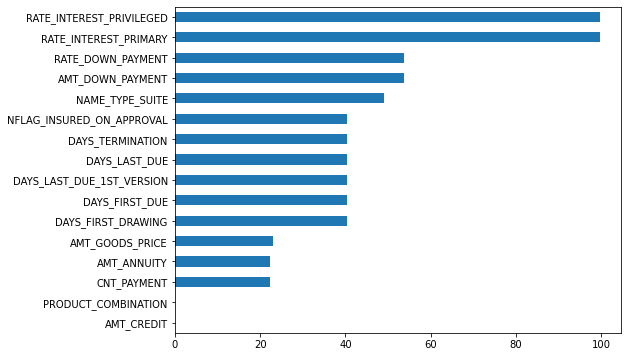

In [12]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in previous.columns if previous[i].isnull().any()]
percent_missing = previous[nan_cols].isna().sum() * 100 / len(previous)
plt.figure(figsize=(8, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

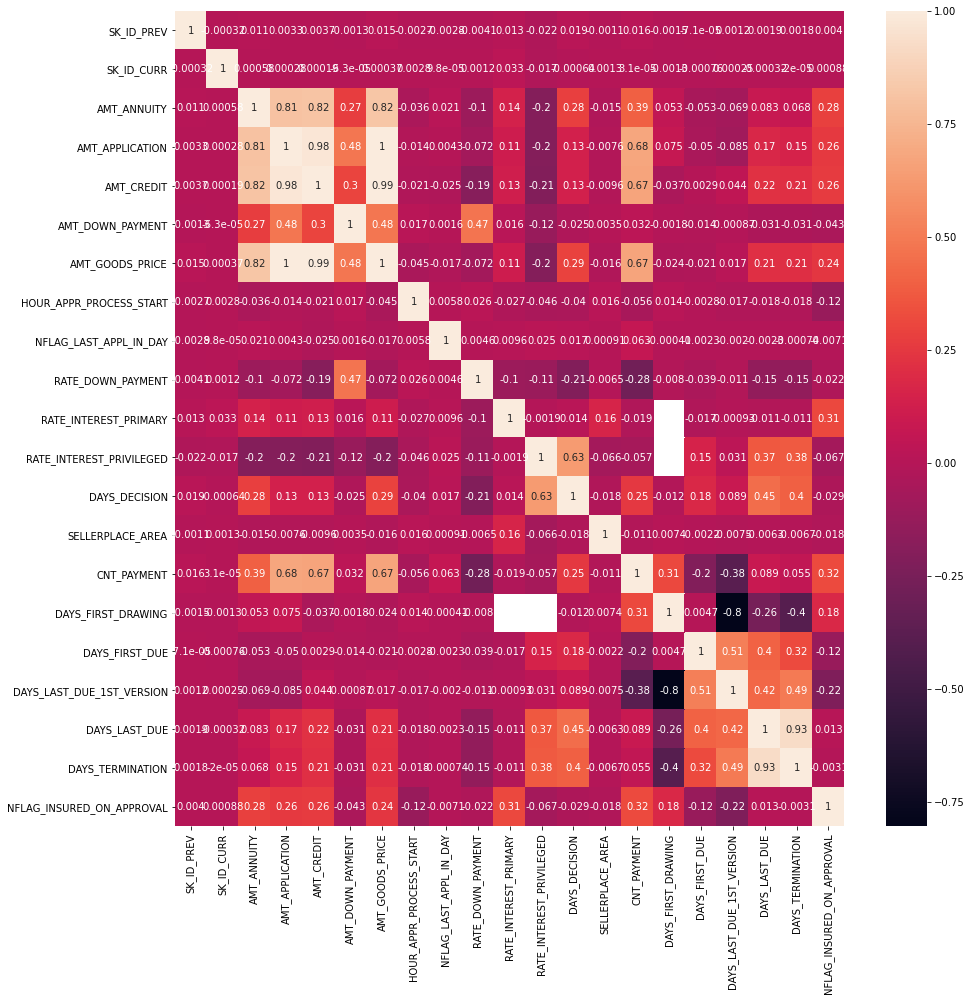

In [13]:
import seaborn as sn

corrMatrix = previous.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
#On se sert des FLAG pour gérer les duplicats:
previous=previous[previous.FLAG_LAST_APPL_PER_CONTRACT=='Y']
previous=previous[previous.NFLAG_LAST_APPL_IN_DAY==1]


AttributeError: 'DataFrame' object has no attribute 'FLAG_LAST_APPL_PER_CONTRACT'

In [29]:
#On vire ces deux colonnes plus quelques autres:
previous.drop(['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START',\
               'HOUR_APPR_PROCESS_START','RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY',\
              'NAME_TYPE_SUITE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION',\
            'CHANNEL_TYPE'],axis=1,inplace=True)
              

In [25]:
#J'enlève aussi les dernières colonnes dont j'aurai une information plus appropriée dans les tableaux CCB,
# POS_CASH et Installments
previous.drop(['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',\
               'DAYS_LAST_DUE', 'DAYS_TERMINATION','CNT_PAYMENT''],axis=1,inplace=True)

In [30]:
df=homecredits[homecredits.Table=='previous_application.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('Previous app')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in previous.columns:
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Previous app
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample
NAME_CONTRACT_TYPE  :  Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
AMT_ANNUITY  :  Annuity of previous application
AMT_APPLICATION  :  For how much credit did client ask on the previous application
AMT_CREDIT  :  Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
AMT_DOWN_PAYMENT  :  Down payment on the previous application
AMT_GOODS_PRICE  :  Goods price of good that client asked for (if applicable) on the previous application
RATE_DOWN_PAYMENT  :  Down payment rate normal

In [31]:
previous

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,middle,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,NaN,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,low_action,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,NaN,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,high,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,NaN,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,middle,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,NaN,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,high,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,0.000000,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,low_normal,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,0.340554,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,middle,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,0.101401,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,low_normal,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,low_normal,1.0


In [34]:
previous.drop(['NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO'],axis=1,inplace=True)

In [ ]:
cashpr=previous[previous.SK_ID_PREV.isin(cashid)]

In [ ]:
cashpr.NAME_CONTRACT_TYPE.unique()

In [ ]:
previous.NAME_CONTRACT_TYPE.unique()

In [109]:
previous.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [38]:
#Au final on va regardé la proportion de contrats approuvés ou avec unused offer
#on va maintenant se concentrer sur les previous application approved
previous=previous[previous.NAME_CONTRACT_STATUS=='Approved']

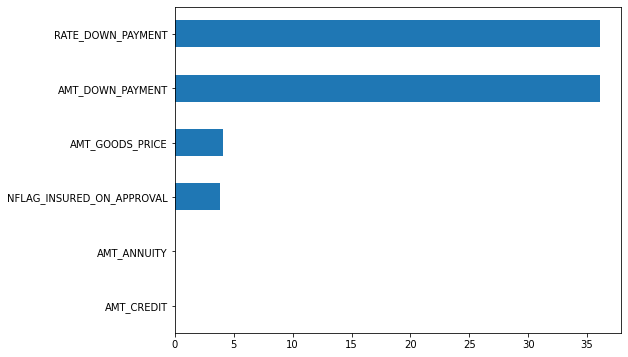

In [48]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in previous.columns if previous[i].isnull().any()]
percent_missing = previous[nan_cols].isna().sum() * 100 / len(previous)
plt.figure(figsize=(8, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [ ]:
#On va considérer que si aucun down payment n'est précisé, il n'y en a pas eu
#On va considérer que si flag insured n'est pas précisé le contrat n'est pas assuré

In [40]:
categorical_columns = [col for col in previous.columns if previous[col].dtype == 'object']
for i in categorical_columns:
    print(i)
    print(previous[i].unique().tolist())

NAME_CONTRACT_TYPE
['Consumer loans', 'Cash loans', 'Revolving loans']
NAME_CASH_LOAN_PURPOSE
['XAP', 'XNA', 'Everyday expenses', 'Car repairs', 'Other', 'Repairs', 'Journey', 'Purchase of electronic equipment', 'Medicine', 'Urgent needs', 'Buying a holiday home / land', 'Education', 'Buying a used car', 'Buying a new car', 'Buying a home', 'Payments on other loans', 'Wedding / gift / holiday', 'Hobby', 'Furniture', 'Building a house or an annex', 'Gasification / water supply', 'Buying a garage', 'Business development', 'Money for a third person', 'Refusal to name the goal']
NAME_CONTRACT_STATUS
['Approved']
CODE_REJECT_REASON
['XAP', 'XNA']
NAME_GOODS_CATEGORY
['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials', 'Auto Accessories', 'Photo / Cinema Equipment', 'Computers', 'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture', 'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry', 'Vehicles', 'Education', 'Medical Supplies', 'Other', 'Direct Sales', 'Offi

In [41]:
#On supprime encore quelques catégories:
previous.drop(['NAME_CONTRACT_STATUS','CODE_REJECT_REASON'],axis=1,inplace=True)

/home/samuel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [117]:
previous

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [44]:
categorical_columns = [col for col in previous.columns if previous[col].dtype == 'object']
for i in categorical_columns:
    print(i)
    print(previous[previous.NAME_PRODUCT_TYPE=='x-sell'][i].unique().tolist())

NAME_CONTRACT_TYPE
['Cash loans', 'Revolving loans']
NAME_CASH_LOAN_PURPOSE
['XNA', 'Everyday expenses', 'XAP', 'Journey', 'Buying a new car', 'Repairs', 'Car repairs', 'Other', 'Buying a home', 'Gasification / water supply', 'Medicine', 'Urgent needs', 'Building a house or an annex', 'Purchase of electronic equipment', 'Payments on other loans', 'Buying a used car', 'Furniture', 'Education', 'Business development', 'Wedding / gift / holiday', 'Buying a holiday home / land', 'Hobby']
NAME_GOODS_CATEGORY
['XNA', 'Audio/Video', 'Consumer Electronics', 'Mobile', 'Furniture', 'Computers', 'Photo / Cinema Equipment', 'Other']
NAME_PRODUCT_TYPE
['x-sell']
NAME_YIELD_GROUP
['low_action', 'high', 'middle', 'low_normal', 'XNA']


In [45]:
categorical_columns = [col for col in previous.columns if previous[col].dtype == 'object']
for i in categorical_columns:
    print(i)
    print(previous[previous.NAME_PRODUCT_TYPE=='walk-in'][i].unique().tolist())

NAME_CONTRACT_TYPE
['Revolving loans', 'Cash loans']
NAME_CASH_LOAN_PURPOSE
['XAP', 'Car repairs', 'XNA', 'Other', 'Repairs', 'Purchase of electronic equipment', 'Medicine', 'Urgent needs', 'Everyday expenses', 'Buying a holiday home / land', 'Education', 'Journey', 'Buying a used car', 'Buying a new car', 'Buying a home', 'Payments on other loans', 'Wedding / gift / holiday', 'Hobby', 'Furniture', 'Building a house or an annex', 'Buying a garage', 'Business development', 'Gasification / water supply', 'Money for a third person', 'Refusal to name the goal']
NAME_GOODS_CATEGORY
['XNA']
NAME_PRODUCT_TYPE
['walk-in']
NAME_YIELD_GROUP
['XNA', 'high', 'low_normal', 'middle', 'low_action']


In [39]:
previous.shape

(1036044, 17)

In [70]:
previous

<function __main__.previous(df)>

<a id="section2.2"> </a>
## B/ Features extraction

In [4]:
def previous_app(df):
    """
    Loads previous_application dataset. 
    Afterwards, feature engineering and aggregations steps are implemented.
    Returns dataframe with feature engineering and aggregations implemented columns.
    
    Columns of returned dataframe include:
    On the entire table:
    - % of rejected offers amongs credits request: prev_%_rejected
    - % of applications for x-sell purchased goods prev_%_x-sell
    On the approved applications:
    - % of credits not insured: prev_%_notinsured
    - % of credit with no down-payment: prev_%_nodownpayment 
    """
    
    prev=df[['SK_ID_CURR','NAME_CONTRACT_STATUS','NAME_PRODUCT_TYPE','RATE_DOWN_PAYMENT','NFLAG_INSURED_ON_APPROVAL']].copy()
    
    #Calcul sur tableau complet
    prev['CONTRACT']=prev['NAME_CONTRACT_STATUS'].apply(lambda x:1 if x=='Rejected' else 0)
    prev['NAME_PRODUCT_TYPE']=prev['NAME_PRODUCT_TYPE'].apply(lambda x:1 if x=='x-sell' else 0)
    prev_agg_prov = prev.groupby(['SK_ID_CURR']).agg({'SK_ID_CURR':'count','CONTRACT':'sum',\
                                                    'NAME_PRODUCT_TYPE':'sum'})
    prev_agg=pd.DataFrame(index=prev_agg_prov.index)
    prev_agg['prev_%_rejected']=prev_agg_prov['CONTRACT']/prev_agg_prov['SK_ID_CURR']
    prev_agg['prev_%_x-sell']=prev_agg_prov['NAME_PRODUCT_TYPE']/prev_agg_prov['SK_ID_CURR']
    
    #Calcul sur le tableau des approved:
    prev=prev[prev.NAME_CONTRACT_STATUS=='Approved']
    prev.fillna(0,inplace=True)
    prev['RATE_DOWN_PAYMENT']=prev['RATE_DOWN_PAYMENT'].apply(lambda x:0 if x>0 else 1)
    prev['NFLAG_INSURED_ON_APPROVAL']=prev['NFLAG_INSURED_ON_APPROVAL'].apply(lambda x:1 if x!=1 else 0)
    prev_agg_prov = prev.groupby(['SK_ID_CURR']).agg({'SK_ID_CURR':'count','NFLAG_INSURED_ON_APPROVAL':'sum',\
                                                    'RATE_DOWN_PAYMENT':'sum'})
    prev_agg['prev_%_notinsured']=prev_agg_prov['NFLAG_INSURED_ON_APPROVAL']/prev_agg_prov['SK_ID_CURR']
    prev_agg['prev_%_nodownpayment']=prev_agg_prov['RATE_DOWN_PAYMENT']/prev_agg_prov['SK_ID_CURR']
    
    return prev_agg.fillna(0) 
    #les na correspondent aux clients dont tous les prets ont été refusé cancelled ou not used
    

<a id="section3"> </a>
# 3. Credit_card_balance

In [3]:
credit_card_balance=pd.read_csv('credit_card_balance.csv')
homecredits=pd.read_csv('HomeCredit_columns_description.csv',encoding='cp1252')

In [4]:
len(credit_card_balance.SK_ID_CURR.unique())

103558

In [12]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [13]:
df=homecredits[homecredits.Table=='credit_card_balance.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in credit_card_balance.columns:
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample
MONTHS_BALANCE  :  Month of balance relative to application date (-1 means the freshest balance date)
AMT_BALANCE  :  Balance during the month of previous credit
AMT_CREDIT_LIMIT_ACTUAL  :  Credit card limit during the month of the previous credit
AMT_DRAWINGS_ATM_CURRENT  :  Amount drawing at ATM during the month of the previous credit
AMT_DRAWINGS_CURRENT  :  Amount drawing during the month of the previous credit
AMT_DRAWINGS_OTHER_CURRENT  :  Amount of other drawings during the month of the previous credit
AMT_DRAWINGS_POS_CURRENT  :  Amount drawing or buying goods during the month of the previous credit
AMT_INST_MIN_REGULARITY  :  Minimal installment for this month of the previous credit
AMT_PAYMENT_CURRENT  :  How much did th

In [14]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


<a id="section3.1"> </a>
# A/ Analyse du tableau

In [15]:
#Pour les CNT_DRAWINGS, on supprime tout sauf CNT_DRAWINGS_CURRENT qui est la somme des autres:
credit_card_balance.drop(\
                ['CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT'],axis=1,inplace=True)

In [16]:
#On supprime tout sauf AMT_DRAWINGS_CURRENT qui est presque toujours la somme des autres et sinon supérieure:
credit_card_balance.drop(\
                ['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT'],axis=1,inplace=True)

In [17]:
df=homecredits[homecredits.Table=='credit_card_balance.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in credit_card_balance.columns.tolist():
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample
MONTHS_BALANCE  :  Month of balance relative to application date (-1 means the freshest balance date)
AMT_BALANCE  :  Balance during the month of previous credit
AMT_CREDIT_LIMIT_ACTUAL  :  Credit card limit during the month of the previous credit
AMT_DRAWINGS_CURRENT  :  Amount drawing during the month of the previous credit
AMT_INST_MIN_REGULARITY  :  Minimal installment for this month of the previous credit
AMT_PAYMENT_CURRENT  :  How much did the client pay during the month on the previous credit
AMT_PAYMENT_TOTAL_CURRENT  :  How much did the client pay during the month in total on the previous credit
AMT_RECEIVABLE_PRINCIPAL  :  Amount receivable for principal on the previous credit
AMT_RECIVABLE  :  Amount receivable on the 

In [20]:
#CNT_INSTALMENT_MATURE_CUM et AMT_INST_MIN_REGULARITY ne représentent rien de très intéressant
#Le premier compte le nb de mois ou le pret a été remboursé mais le prendr en compte reviendrait
#A pénaliser des comptes qui n'auraient pas utilisé le crédit alors qu'ils le pouvaient
#AMT_INST_MIN_REGULARITY non plus il représente le remboursement minimal effectué dans un mois
#On vire ces deux colonnes:
credit_card_balance.drop(\
                ['AMT_INST_MIN_REGULARITY','CNT_INSTALMENT_MATURE_CUM'],axis=1,inplace=True)

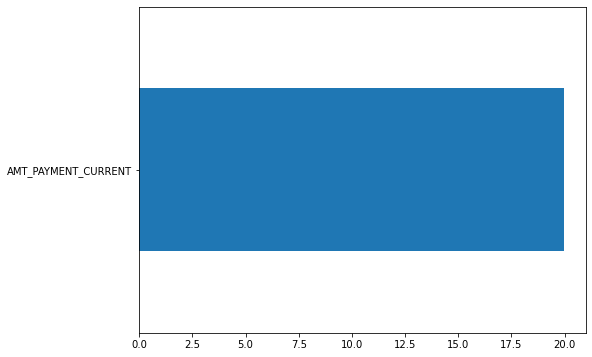

In [21]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in credit_card_balance.columns if credit_card_balance[i].isnull().any()]
percent_missing = credit_card_balance[nan_cols].isna().sum() * 100 / len(credit_card_balance)
plt.figure(figsize=(8, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

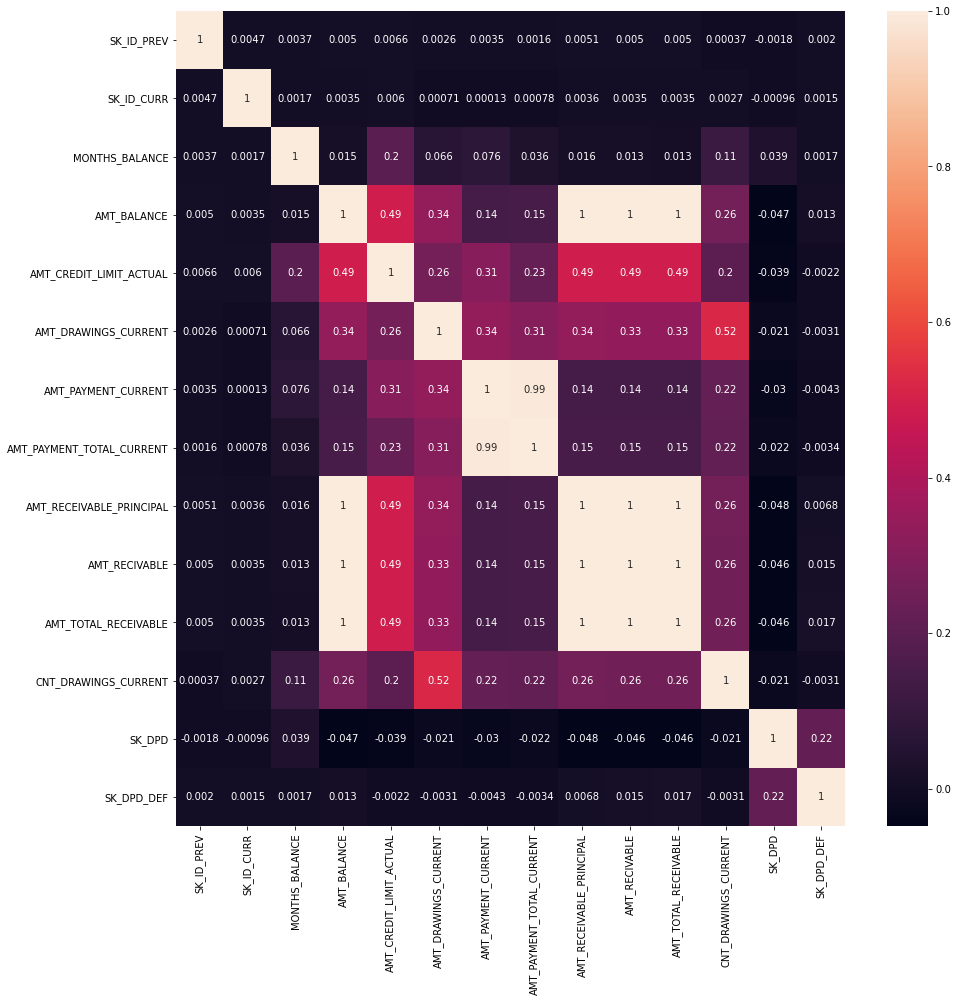

In [22]:
import seaborn as sn

corrMatrix = credit_card_balance.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
#On supprime donc en plus: AMT_PAYMENT_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE et AMT_TOTAL_RECEIVABLE
credit_card_balance.drop(\
                ['AMT_PAYMENT_CURRENT','AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE'],axis=1,inplace=True)

In [24]:
credit_card_balance.NAME_CONTRACT_STATUS.unique()

array(['Active', 'Completed', 'Demand', 'Signed', 'Sent proposal',
       'Refused', 'Approved'], dtype=object)

In [26]:
credit_card_balance[credit_card_balance.NAME_CONTRACT_STATUS=='Sent proposal']['MONTHS_BALANCE'].unique()

array([-86, -95, -87, -93, -77, -92, -91, -85, -94, -96, -78, -79, -76,
       -72, -74, -75, -73, -83, -82, -88, -89, -84, -81, -41, -80, -90,
       -70, -42, -68, -71, -67])

<a id="section3.2"> </a>
# B/ Features extraction

In [27]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,CNT_DRAWINGS_CURRENT,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,877.5,1800.000,1,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,1,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,2250.000,0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,11925.000,1,Active,0,0
4,1891521,126868,-1,453919.455,450000,11547.0,27000.000,1,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,0.0,0.000,0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.000,0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,356994.675,2,Active,0,0
3840310,1624872,430337,-10,0.000,450000,0.0,0.000,0,Active,0,0


In [28]:
df=homecredits[homecredits.Table=='credit_card_balance.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    if df.iloc[i]['Row'] in credit_card_balance.columns.tolist():
        print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample
MONTHS_BALANCE  :  Month of balance relative to application date (-1 means the freshest balance date)
AMT_BALANCE  :  Balance during the month of previous credit
AMT_CREDIT_LIMIT_ACTUAL  :  Credit card limit during the month of the previous credit
AMT_DRAWINGS_CURRENT  :  Amount drawing during the month of the previous credit
AMT_PAYMENT_TOTAL_CURRENT  :  How much did the client pay during the month in total on the previous credit
CNT_DRAWINGS_CURRENT  :  Number of drawings during this month on the previous credit
NAME_CONTRACT_STATUS  :  Contract status (active signed,...) on the previous credit
SK_DPD  :  DPD (Days past due) during the month on the previous credit
SK_DPD_DEF  :  DPD (Days past due) during the month with toleranc

In [30]:
def CCB(df):
    """
    Loads credit_card_balance dataset. 
    Afterwards, feature engineering and aggregations steps are implemented.
    Returns dataframe with feature engineering and aggregations implemented columns.
    
    Columns of returned dataframe include:
    - Nb of active contract at the time of the loan: CC_Active
    - Montant de crédit at the time of the loan: CC_AMT
    - Percentage of CREDIT_LIMIT at the time of the loan: CC_AMT_% 
    - Min, Max and Mean monthly drawings over the last 6 months: CC_Monthly_draw_min,max,mean
    - Min, Max and Mean monthly payment over the last 6 months: CC_Monthly_pay_min,max,mean
    - Percentage of months with DPD for all contracts: CC_DPD
    - Percentage of months with DPD_DEF for all contracts: CC_DPD_DEF
    """
    
    cc_agg=pd.DataFrame()
    #Calcul des DPD
    cc=df[['SK_ID_CURR','MONTHS_BALANCE','SK_DPD','SK_DPD_DEF']].copy()  
    cc['SK_DPD_DEF']=cc['SK_DPD_DEF'].apply(lambda x: 1 if x>0 else 0)
    cc['SK_DPD']=cc['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
    cc_agg_prov = cc.groupby(['MONTHS_BALANCE','SK_ID_CURR']).agg({'SK_ID_CURR':'first','SK_DPD':'max','SK_DPD_DEF':'max'}).unstack()
    cc_agg['CC_DPD']=cc_agg_prov['SK_DPD'].sum()/cc_agg_prov['SK_DPD'].count()
    cc_agg['CC_DPD_DEF']=cc_agg_prov['SK_DPD_DEF'].sum()/cc_agg_prov['SK_DPD_DEF'].count()
    
    #Calcul de CC_Active, CC_AMT et CC_AMT_%:
    cc=df[['SK_ID_CURR','MONTHS_BALANCE','AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','NAME_CONTRACT_STATUS']].copy()
    cc=cc[cc['MONTHS_BALANCE']==-1]
    cc['NAME_CONTRACT_STATUS']=cc['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x in \
                                ['Active','Demand', 'Signed', 'Sent proposal','Approved'] else 0)
    
    cc_agg1=cc.groupby('SK_ID_CURR').agg({'AMT_BALANCE':'sum','AMT_CREDIT_LIMIT_ACTUAL':'sum','NAME_CONTRACT_STATUS':'sum'})
    cc_agg1['AMT_CREDIT_LIMIT_ACTUAL']=cc_agg1['AMT_BALANCE']/(cc_agg1['AMT_CREDIT_LIMIT_ACTUAL']+1)
    cc_agg1.columns=['CC_AMT','CC_AMT_%','CC_Active']
    
    cc_agg=pd.merge(cc_agg,cc_agg1,left_index=True,right_index=True,how='left')
    
    del cc_agg1#,cc_agg3
    
    #Calcul des Min, Max et Mean monthly drawings et payments
    cc=df[['SK_ID_CURR','MONTHS_BALANCE','AMT_DRAWINGS_CURRENT','AMT_PAYMENT_TOTAL_CURRENT']].copy()
    cc=cc[cc['MONTHS_BALANCE']>=-6]
    cc_agg_prov = cc.groupby(['MONTHS_BALANCE','SK_ID_CURR']).agg({'SK_ID_CURR':'first','AMT_DRAWINGS_CURRENT':'sum','AMT_PAYMENT_TOTAL_CURRENT':'sum'}).unstack()
    cc_agg['CC_Monthly_draw_min']=cc_agg_prov['AMT_DRAWINGS_CURRENT'].min()
    cc_agg['CC_Monthly_draw_max']=cc_agg_prov['AMT_DRAWINGS_CURRENT'].max()
    cc_agg['CC_Monthly_draw_mean']=cc_agg_prov['AMT_DRAWINGS_CURRENT'].mean()
    cc_agg['CC_Monthly_pay_min']=cc_agg_prov['AMT_PAYMENT_TOTAL_CURRENT'].min()
    cc_agg['CC_Monthly_pay_max']=cc_agg_prov['AMT_PAYMENT_TOTAL_CURRENT'].max()
    cc_agg['CC_Monthly_pay_mean']=cc_agg_prov['AMT_PAYMENT_TOTAL_CURRENT'].mean()
    
    del cc,cc_agg_prov
    
    return cc_agg.fillna(0)
    
    

In [30]:
CCB=CCB(credit_card_balance)

In [31]:
CCB.to_csv('CCB.csv')

In [32]:
CCB.head()

,DPD,DPD_DEF,CC_AMT,CC_AMT_%,CC_Active,CC_Monthly_draw_min,CC_Monthly_draw_max,CC_Monthly_draw_mean,CC_Monthly_pay_min,CC_Monthly_pay_max,CC_Monthly_pay_mean
SK_ID_CURR,,,,,,,,,,,
100006,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100011,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100013,0.010417,0.010417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
100021,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100023,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
CCB.CC_Active.unique()

array([1., 0., 2.])

In [34]:
del credit_card_balance

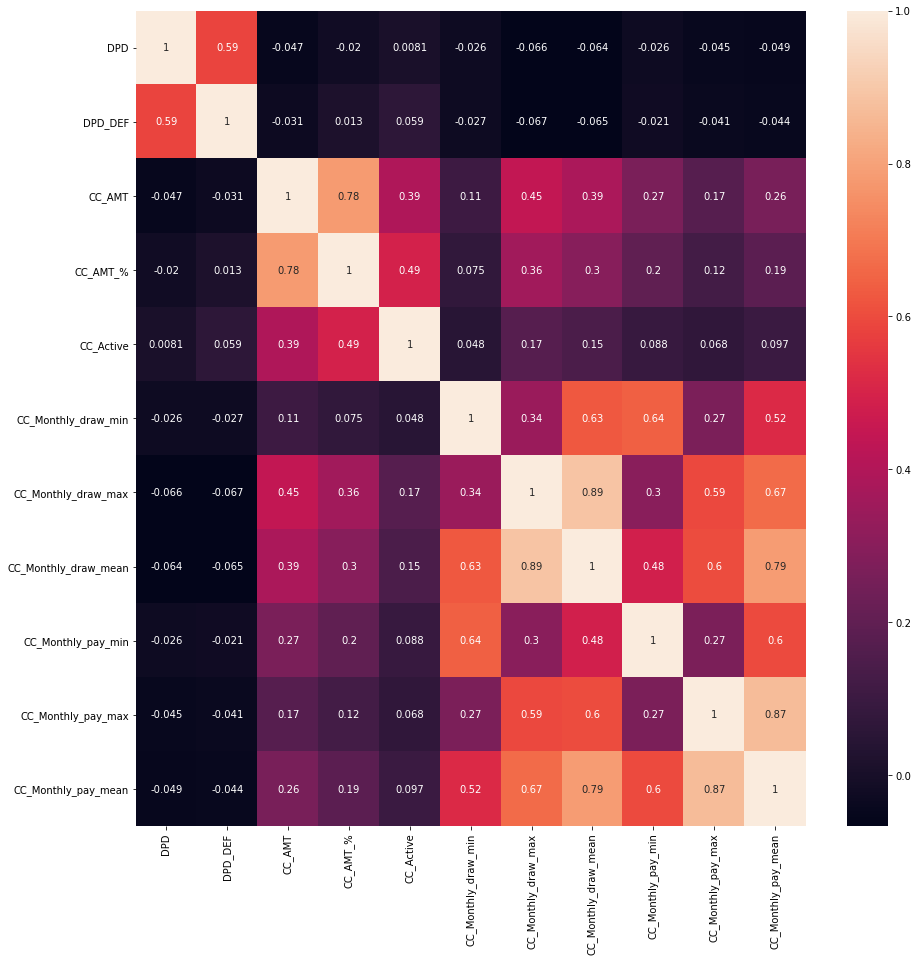

In [51]:
import seaborn as sn

corrMatrix = CCB.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

<a id="section4"> </a>
# 4. Installments

In [35]:
inst=pd.read_csv('installments_payments.csv')

In [36]:
len(inst.SK_ID_CURR.unique())

339587

In [37]:
inst.shape

(13605401, 8)

In [38]:
homecredits.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [39]:
df=homecredits[homecredits.Table=='installments_payments.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('Installments')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Installments
-----------------------------------------------------------------------------------------------------------
SK_ID_PREV   :  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
SK_ID_CURR  :  ID of loan in our sample
NUM_INSTALMENT_VERSION  :  Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
NUM_INSTALMENT_NUMBER  :  On which installment we observe payment
DAYS_INSTALMENT  :  When the installment of previous credit was supposed to be paid (relative to application date of current loan)
DAYS_ENTRY_PAYMENT  :  When was the installments of previous credit paid actually (relative to application date of current loan)
AMT_INSTALMENT  :  What was t

In [40]:
inst.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


<a id="section4.1"> </a>
# A/ Analyse du tableau

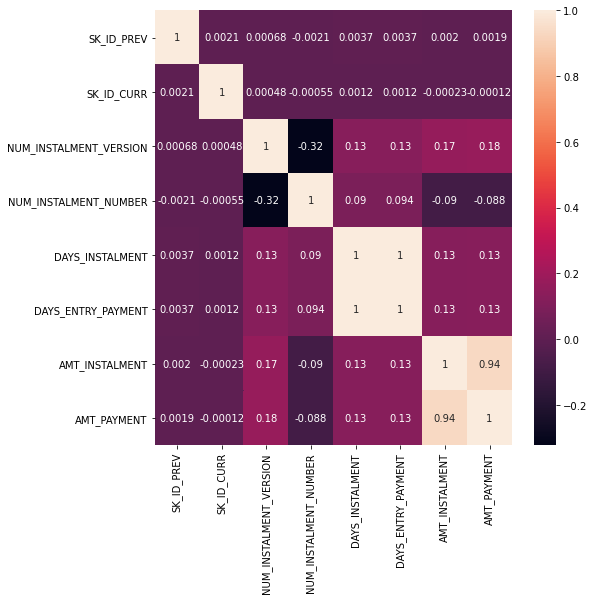

In [41]:
import seaborn as sn

corrMatrix = inst.corr()

plt.figure(figsize=(8,8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

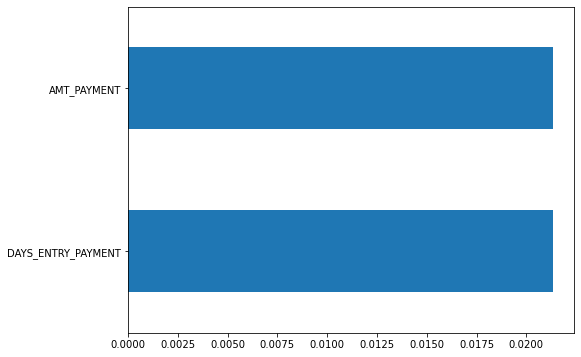

In [42]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in inst.columns if inst[i].isnull().any()]
percent_missing = inst[nan_cols].isna().sum() * 100 / len(inst)
plt.figure(figsize=(8, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [43]:
inst.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [44]:
len(inst[inst.DAYS_ENTRY_PAYMENT.isnull()]['SK_ID_CURR'].unique())

1249

In [ ]:
#Peu de valeurs manquantes, on va ignorer ces mois dans les calculs de nos variables

<a id="section4.2"> </a>
# B/ Features extraction

In [31]:
def installments(df):
    """
    Loads installments_payments dataset. 
    Afterwards, feature engineering and aggregations steps are implemented.
    Returns dataframe with feature engineering and aggregations implemented columns.

    Returns differences between payment due and real instalments and days due and days of payment
    Takes 'max', 'mean', 'sum', 'var' for thoses
    """
    
    df=df[['SK_ID_CURR','AMT_PAYMENT','AMT_INSTALMENT','DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT']].copy()
    
    # Percentage and difference paid in each installment (amount paid and installment value)
    df['PAYMENT_PERC'] = df['AMT_PAYMENT'] / (df['AMT_INSTALMENT']+1)
    df['PAYMENT_DIFF'] = df['AMT_INSTALMENT'] - df['AMT_PAYMENT']
    # Differences in days paid and expected
    df['DAYS_DIFF'] = df['DAYS_ENTRY_PAYMENT'] - df['DAYS_INSTALMENT']
    # Features: Perform aggregations
    aggregations = {
        'DAYS_DIFF': ['max', 'mean', 'sum','var'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        }
    ins_agg = df.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INST_' + e[0].lower() + "_" + e[1].lower() for e in ins_agg.columns.tolist()])
    del df
    return ins_agg

In [46]:
installments=installments(inst)

In [47]:
installments.to_csv('installments.csv')

In [49]:
installments

,INST_days_diff_max,INST_days_diff_mean,INST_days_diff_sum,INST_days_diff_var,INST_payment_perc_max,INST_payment_perc_mean,INST_payment_perc_sum,INST_payment_perc_var,INST_payment_diff_max,INST_payment_diff_mean,INST_payment_diff_sum,INST_payment_diff_var
SK_ID_CURR,,,,,,,,,,,,
100001,11.0,-7.285714,-51.0,213.904762,1.00000,1.000000,7.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
100002,-12.0,-20.421053,-388.0,24.257310,1.00000,1.000000,19.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
100003,-1.0,-7.160000,-179.0,13.890000,1.00000,1.000000,25.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
100004,-3.0,-7.666667,-23.0,17.333333,1.00000,1.000000,3.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
100005,1.0,-23.555556,-212.0,182.527778,1.00000,1.000000,9.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
456251,-8.0,-36.285714,-254.0,198.238095,1.00000,1.000000,7.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
456252,3.0,-2.833333,-17.0,22.166667,1.00000,1.000000,6.000000,0.000000,0.000,0.00000,0.000,0.000000e+00
456253,9.0,-14.500000,-203.0,271.038462,1.00000,0.928571,13.000000,0.070380,3945.825,283.79250,3973.095,1.110980e+06


In [48]:
del inst

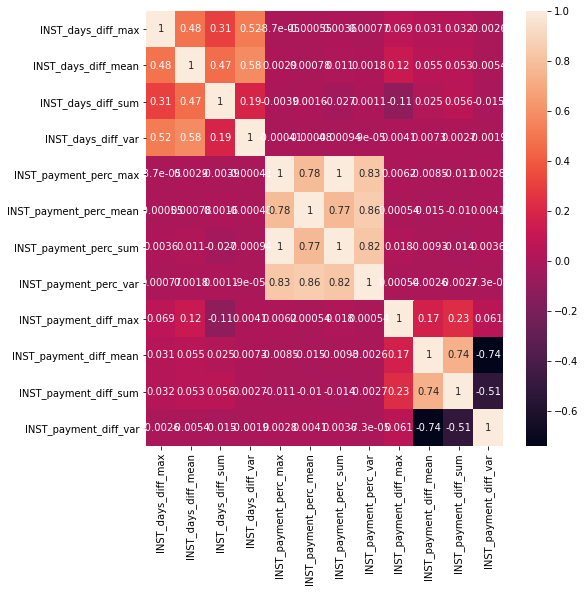

In [50]:
import seaborn as sn

corrMatrix = installments.corr()

plt.figure(figsize=(8,8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

<a id="section5"> </a>
# 5. POS_Cash

In [2]:
cash=pd.read_csv('POS_CASH_balance.csv')

In [3]:
len(cash.SK_ID_CURR.unique())

337252

In [4]:
cash.shape

(10001358, 8)

In [57]:
df=homecredits[homecredits.Table=='POS_CASH_balance.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('Cash')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
Cash
-----------------------------------------------------------------------------------------------------------
SK_ID_PREV   :  ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
SK_ID_CURR  :  ID of loan in our sample
MONTHS_BALANCE  :  Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
CNT_INSTALMENT  :  Term of previous credit (can change over time)
CNT_INSTALMENT_FUTURE  :  Installments left to pay on the previous credit
NAME_CONTRACT_STATUS  :  Contract status during the month
SK_DPD  :  DPD (days past due) during the month of previous credit
SK_DPD_DEF  :  DPD during the month wi

<a id="section5.1"> </a>
# A/ Analyse du tableau

In [6]:
cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


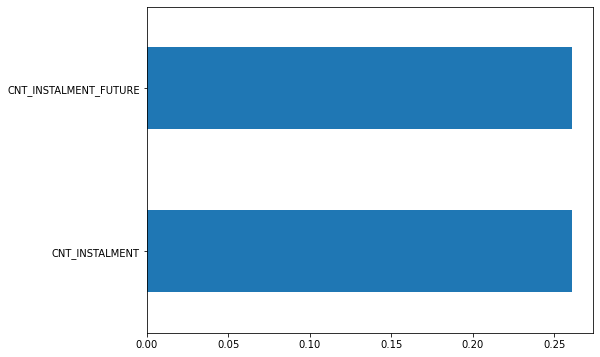

In [7]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in cash.columns if cash[i].isnull().any()]
percent_missing = cash[nan_cols].isna().sum() * 100 / len(cash)
plt.figure(figsize=(8, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [8]:
cash[cash.SK_ID_PREV==1803195]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
750221,1803195,182943,-17,48.0,31.0,Active,0,0
861808,1803195,182943,-21,48.0,35.0,Active,0,0
925513,1803195,182943,-8,48.0,21.0,Active,0,0
1120907,1803195,182943,-4,48.0,17.0,Active,0,0
1660128,1803195,182943,-2,48.0,15.0,Active,0,0
1826804,1803195,182943,-24,48.0,38.0,Active,0,0
1843615,1803195,182943,-11,48.0,25.0,Active,0,0
1991852,1803195,182943,-3,48.0,16.0,Active,0,0
1996667,1803195,182943,-10,48.0,23.0,Active,0,0


In [9]:
actuel=cash[cash.MONTHS_BALANCE.isin([-1,0])]

In [31]:
previous=pd.read_csv('previous_application.csv')

In [11]:
previous.FLAG_LAST_APPL_PER_CONTRACT.unique()

array(['Y', 'N'], dtype=object)

In [14]:
previous=previous[previous.FLAG_LAST_APPL_PER_CONTRACT=='Y']

In [16]:
previous=previous[previous.NFLAG_LAST_APPL_IN_DAY==1]

In [17]:
actuel

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
701,2373788,146563,-1,12.0,12.0,Active,0,0
706,1328586,360581,-1,12.0,10.0,Active,0,0
735,1059231,187644,-1,24.0,21.0,Active,0,0
736,1627415,370458,-1,6.0,6.0,Active,0,0
737,2070143,417012,-1,6.0,5.0,Active,0,0
...,...,...,...,...,...,...,...,...
9999788,2610249,313023,-1,6.0,0.0,Completed,0,0
10000684,1290101,322484,-1,6.0,0.0,Completed,0,0
10001004,2465369,301648,-1,36.0,6.0,Active,0,0
10001005,1262435,310762,-1,30.0,2.0,Active,0,0


In [50]:
#On va récupérer les annuité à partir du tableau previous application pour connaitre les mensualités en cours
actuel2=pd.merge(actuel,previous[['SK_ID_PREV','AMT_CREDIT','AMT_ANNUITY','DAYS_DECISION']],on='SK_ID_PREV')

In [51]:
actuel2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_CREDIT,AMT_ANNUITY,DAYS_DECISION
0,2373788,146563,-1,12.0,12.0,Active,0,0,107640.0,10616.805,-23
1,1328586,360581,-1,12.0,10.0,Active,0,0,44716.5,4643.730,-96
2,1059231,187644,-1,24.0,21.0,Active,0,0,274500.0,12363.480,-138
3,1627415,370458,-1,6.0,6.0,Active,0,0,61677.0,11966.940,-29
4,2070143,417012,-1,6.0,5.0,Active,0,0,99486.0,19222.875,-80
...,...,...,...,...,...,...,...,...,...,...,...
94648,2610249,313023,-1,6.0,0.0,Completed,0,0,29164.5,5611.230,-2423
94649,1290101,322484,-1,6.0,0.0,Completed,0,0,26284.5,5359.410,-1629
94650,2465369,301648,-1,36.0,6.0,Active,0,0,99792.0,4440.735,-944
94651,1262435,310762,-1,30.0,2.0,Active,0,0,898209.0,47865.555,-878


In [48]:
actuel2.isnull().sum()

SK_ID_PREV                 0
SK_ID_CURR                 0
MONTHS_BALANCE             0
CNT_INSTALMENT           462
CNT_INSTALMENT_FUTURE    462
NAME_CONTRACT_STATUS       0
SK_DPD                     0
SK_DPD_DEF                 0
AMT_CREDIT                 0
AMT_ANNUITY                0
dtype: int64

In [52]:
actuel2[actuel2['CNT_INSTALMENT'].isnull()]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_CREDIT,AMT_ANNUITY,DAYS_DECISION
524,1907942,350092,-1,NaN,NaN,Returned to the store,0,0,17509.5,2468.655,-41
1636,1922993,126350,-1,NaN,NaN,Signed,0,0,51466.5,5845.545,-20
5683,1430322,273327,-1,NaN,NaN,Signed,0,0,40806.0,7766.190,-18
5888,1026268,250375,-1,NaN,NaN,Signed,0,0,46678.5,6369.300,-28
6158,1235441,205502,-1,NaN,NaN,Signed,0,0,22455.0,4517.280,-25
...,...,...,...,...,...,...,...,...,...,...,...
93200,2066117,109633,-1,NaN,NaN,Signed,0,0,60300.0,6848.865,-30
93343,2467053,256515,-1,NaN,NaN,Signed,0,0,141750.0,13939.785,-29
93358,2474422,103770,-1,NaN,NaN,Signed,0,0,211225.5,20577.600,-18
94043,1229527,386805,-1,NaN,NaN,Signed,0,0,83380.5,15549.210,-225


In [57]:
#Pour les nan de CNT_INSTALLMENT on va prendre AMT_CREDIT/AMT_ANNUITY
#Pour les CNT_INSTALLMENT on va prendre DAYS_DECISION//30
actuel2['CNT_INSTALMENT']=actuel2.apply(lambda x : x['AMT_CREDIT']/x['AMT_ANNUITY']\
                                        if x['CNT_INSTALMENT']!=x['CNT_INSTALMENT'] else x['CNT_INSTALMENT'],axis=1)
actuel2['CNT_INSTALMENT_FUTURE']=actuel2.apply(lambda x : x['CNT_INSTALMENT']-x['DAYS_DECISION']//30\
                                        if x['CNT_INSTALMENT_FUTURE']!=x['CNT_INSTALMENT_FUTURE']\
                                               else x['CNT_INSTALMENT_FUTURE'],axis=1)


In [59]:
actuel2.iloc[524:526]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_CREDIT,AMT_ANNUITY,DAYS_DECISION
524,1907942,350092,-1,7.092729,9.092729,Returned to the store,0,0,17509.5,2468.655,-41
525,1351011,261434,-1,16.000000,11.000000,Active,0,0,198909.0,15898.815,-182


In [60]:
#de la on extrait combien il reste à payer au total par client et le nombre de mensualités moyennes et maximales
actuel2['AMT_LEFT']=actuel2['AMT_CREDIT']*actuel2['CNT_INSTALMENT_FUTURE']/actuel2['CNT_INSTALMENT']

In [61]:
actuel2.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
AMT_CREDIT               0
AMT_ANNUITY              0
DAYS_DECISION            0
AMT_LEFT                 0
dtype: int64

<a id="section5.2"> </a>
# B/ Features extraction

In [7]:
def POScash(df,previous_application):
    """
    Loads POS_cash dataset and previous_application dataset. 
    Afterwards, feature engineering and aggregations steps are implemented.
    Returns dataframe with feature engineering and aggregations implemented columns.

    Returns 
    - Percentage of months with DPD for all contracts: POS_DPD
    - Percentage of months with DPD_DEF for all contracts: POS_DPD_DEF
    After agregation with Previous_applications returns
    - Amount left to pay (total of credit remaining) POS_AMT
    - Annuity min max and mean POS_CNT_INSTALMENT_FUTURE_min,max,mean   
    """
    pos=df[['SK_ID_CURR','MONTHS_BALANCE','SK_DPD','SK_DPD_DEF']].copy()
    actuel=df[df.MONTHS_BALANCE.isin([-1,0])].copy()
    actuel=pd.merge(actuel,previous_application[['SK_ID_PREV','AMT_CREDIT','AMT_ANNUITY','DAYS_DECISION']],on='SK_ID_PREV')
    
    del df,previous_application
    
    #Calcul des DPD
    pos_agg=pd.DataFrame()
    pos['SK_DPD_DEF']=pos['SK_DPD_DEF'].apply(lambda x: 1 if x>0 else 0)
    pos['SK_DPD']=pos['SK_DPD'].apply(lambda x: 1 if x>0 else 0)
    pos_agg_prov = pos.groupby(['MONTHS_BALANCE','SK_ID_CURR']).agg({'SK_ID_CURR':'first','SK_DPD':'max','SK_DPD_DEF':'max'}).unstack()
    pos_agg['POS_DPD']=pos_agg_prov['SK_DPD'].sum()/pos_agg_prov['SK_DPD'].count()
    pos_agg['POS_DPD_DEF']=pos_agg_prov['SK_DPD_DEF'].sum()/pos_agg_prov['SK_DPD_DEF'].count()
    
    del pos
    
    # Calcul des montants restants et des mensualités restantes
    
    #Traitement des valeurs manquantes
    actuel['CNT_INSTALMENT']=actuel.apply(lambda x : x['AMT_CREDIT']/x['AMT_ANNUITY']\
                                        if x['CNT_INSTALMENT']!=x['CNT_INSTALMENT'] else x['CNT_INSTALMENT'],axis=1)
    actuel['CNT_INSTALMENT_FUTURE']=actuel.apply(lambda x : x['CNT_INSTALMENT']-x['DAYS_DECISION']//30\
                                        if x['CNT_INSTALMENT_FUTURE']!=x['CNT_INSTALMENT_FUTURE']\
                                               else x['CNT_INSTALMENT_FUTURE'],axis=1)
    
    #Calcul des features
    actuel['POS_AMT']=actuel['AMT_CREDIT']*actuel['CNT_INSTALMENT_FUTURE']/actuel['CNT_INSTALMENT']
    actuel.groupby('SK_ID_CURR').agg({})
    aggregations = {
        'POS_AMT': ['sum'],
        'CNT_INSTALMENT_FUTURE': ['min', 'max', 'mean'],
        }
    
    pos_agg2 = actuel.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg2.columns = pd.Index(['POS_' + e[0].lower() + "_" + e[1].lower() for e in pos_agg2.columns.tolist()])
    
    del actuel
    #On retourne le merging des deux à gauche sur le premier en remplissant les valeurs manquantes à 0
    return pd.merge(pos_agg,pos_agg2,left_index=True,right_index=True,how='left').fillna(0)

In [14]:
cashPOS=POScash(pd.read_csv('POS_CASH_balance.csv'),pd.read_csv('previous_application.csv'))

In [15]:
cashPOS

,POS_DPD,POS_DPD_DEF,POS_pos_amt_sum,POS_cnt_instalment_future_min,POS_cnt_instalment_future_max,POS_cnt_instalment_future_mean
SK_ID_CURR,,,,,,
100001,0.111111,0.111111,0.000000,0.0,0.0,0.0
100002,0.000000,0.000000,44763.750000,6.0,6.0,6.0
100003,0.000000,0.000000,0.000000,0.0,0.0,0.0
100004,0.000000,0.000000,0.000000,0.0,0.0,0.0
100005,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
456251,0.000000,0.000000,0.000000,0.0,0.0,0.0
456252,0.000000,0.000000,0.000000,0.0,0.0,0.0
456253,0.066667,0.066667,0.000000,0.0,0.0,0.0


In [17]:
cashPOS[cashPOS.POS_pos_amt_sum>0]

,POS_DPD,POS_DPD_DEF,POS_pos_amt_sum,POS_cnt_instalment_future_min,POS_cnt_instalment_future_max,POS_cnt_instalment_future_mean
SK_ID_CURR,,,,,,
100002,0.000000,0.000000,44763.750000,6.0,6.0,6.0
100006,0.000000,0.000000,66982.500000,3.0,3.0,3.0
100007,0.000000,0.000000,148572.937500,13.0,13.0,13.0
100009,0.000000,0.000000,79768.800000,9.0,9.0,9.0
100014,0.000000,0.000000,49200.000000,4.0,4.0,4.0
...,...,...,...,...,...,...
456242,0.000000,0.000000,23569.650000,3.0,3.0,3.0
456244,0.033898,0.033898,944790.000000,55.0,55.0,55.0
456245,0.000000,0.000000,82221.562500,17.0,17.0,17.0


<a id="section6"> </a>
# 6. Bureau et Bureau_balance

In [303]:
bb=pd.read_csv('bureau_balance.csv')
bureau=pd.read_csv('bureau.csv')

In [304]:
print(len(bb['SK_ID_BUREAU'].unique()),len(bureau['SK_ID_BUREAU'].unique()))
print(bb.shape,bureau.shape)

817395 1716428
(27299925, 3) (1716428, 17)


<a id="section6.1"> </a>
## A/ Bureau_balance

In [305]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [306]:
bb.STATUS.unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [307]:
#on crée une variable qui prends en compte la longueur du DPD mais aussi son ancienneté, plus il est ancien,
#moins il est important et plus il est long plus il est important
#On commence par faire une colonne DPD en prennant les valeurs numériques >0 de la colonne Status
bb['DPD']=bb['STATUS'].apply(lambda x: int(x) if x in ['1', '2', '3', '5', '4'] else 0)

In [308]:
#On crée notre colonne DPD
bb['DPD']=bb['DPD']/(-bb['MONTHS_BALANCE']+1)

In [309]:
bb_agg = bb.groupby('SK_ID_BUREAU').agg({'DPD':'sum'})

In [310]:
bb_agg

,DPD
SK_ID_BUREAU,
5001709,0.000000
5001710,0.000000
5001711,0.000000
5001712,0.000000
5001713,0.000000
...,...
6842884,0.000000
6842885,15.516053
6842886,0.000000


In [311]:
listing=bb_agg.index

<a id="section6.2"> </a>
## B/ Bureau

In [312]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [313]:
homecredits=pd.read_csv('HomeCredit_columns_description.csv',encoding='cp1252')
homecredits.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [314]:
df=homecredits[homecredits.Table=='bureau.csv']
print('-----------------------------------------------------------------------------------------------------------')
print('CCB')
print('-----------------------------------------------------------------------------------------------------------')
for i in range(df.shape[0]):
    print(df.iloc[i]['Row'],' : ',df.iloc[i]['Description'])
print('-----------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------
CCB
-----------------------------------------------------------------------------------------------------------
SK_ID_CURR  :  ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 
SK_BUREAU_ID  :  Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
CREDIT_ACTIVE  :  Status of the Credit Bureau (CB) reported credits
CREDIT_CURRENCY  :  Recoded currency of the Credit Bureau credit
DAYS_CREDIT  :  How many days before current application did client apply for Credit Bureau credit
CREDIT_DAY_OVERDUE  :  Number of days past due on CB credit at the time of application for related loan in our sample
DAYS_CREDIT_ENDDATE  :  Remaining duration of CB credit (in days) at the time of application in Home Credit
DAYS_ENDDATE_FACT  :  Days since CB credit ended at the time of appl

# Traitement des devises

In [315]:
currencies=bureau.groupby(['CREDIT_CURRENCY','CREDIT_TYPE']).agg({'AMT_CREDIT_SUM':'mean'}).unstack().T
currencies

CREDIT_CURRENCY                                                currency 1  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                          3.471562e+05   
               Car loan                                      1.771215e+06   
               Cash loan (non-earmarked)                     5.414571e+05   
               Consumer credit                               3.051869e+05   
               Credit card                                   1.722559e+05   
               Interbank credit                              1.350000e+04   
               Loan for business development                 1.370655e+06   
               Loan for purchase of shares (margin lending)  3.334500e+06   
               Loan for the purchase of equipment            4.432927e+06   
               Loan for working capital replenishment        1.559215e+06   
               Microloan                                     5.294773e+04   
               Mobile operator loan                          1.485000e+07   
               Mortgage                                      5.359925e+06   
               Real estate loan                              3.942349e+06   
               Unknown type of loan                          4.325464e+05   

CREDIT_CURRENCY                                                currency 2  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                          1.860000e+06   
               Car loan                                      5.266820e+06   
               Cash loan (non-earmarked)                              NaN   
               Consumer credit                               2.014306e+06   
               Credit card                                   8.511028e+05   
               Interbank credit                                       NaN   
               Loan for business development                 1.145802e+07   
               Loan for purchase of shares (margin lending)           NaN   
               Loan for the purchase of equipment                     NaN   
               Loan for working capital replenishment                 NaN   
               Microloan                                              NaN   
               Mobile operator loan                                   NaN   
               Mortgage                                      3.263687e+07   
               Real estate loan                              3.544695e+07   
               Unknown type of loan                          3.208500e+05   

CREDIT_CURRENCY                                                currency 3  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                                   NaN   
               Car loan                                      7.823966e+06   
               Cash loan (non-earmarked)                              NaN   
               Consumer credit                               1.172444e+06   
               Credit card                                   8.830104e+05   
               Interbank credit                                       NaN   
               Loan for business development                 1.074686e+06   
               Loan for purchase of shares (margin lending)           NaN   
               Loan for the purchase of equipment                     NaN   
               Loan for working capital replenishment                 NaN   
               Microloan                                              NaN   
               Mobile operator loan                                   NaN   
               Mortgage                                               NaN   
               Real estate loan                                       NaN   
               Unknown type of loan                                   NaN   

CREDIT_CURRENCY                                               currency

In [316]:
currencies['1-2']=currencies['currency 2']/currencies['currency 1']
currencies['1-3']=currencies['currency 3']/currencies['currency 1']
currencies['1-4']=currencies['currency 4']/currencies['currency 1']

In [317]:
currencies

CREDIT_CURRENCY                                                currency 1  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                          3.471562e+05   
               Car loan                                      1.771215e+06   
               Cash loan (non-earmarked)                     5.414571e+05   
               Consumer credit                               3.051869e+05   
               Credit card                                   1.722559e+05   
               Interbank credit                              1.350000e+04   
               Loan for business development                 1.370655e+06   
               Loan for purchase of shares (margin lending)  3.334500e+06   
               Loan for the purchase of equipment            4.432927e+06   
               Loan for working capital replenishment        1.559215e+06   
               Microloan                                     5.294773e+04   
               Mobile operator loan                          1.485000e+07   
               Mortgage                                      5.359925e+06   
               Real estate loan                              3.942349e+06   
               Unknown type of loan                          4.325464e+05   

CREDIT_CURRENCY                                                currency 2  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                          1.860000e+06   
               Car loan                                      5.266820e+06   
               Cash loan (non-earmarked)                              NaN   
               Consumer credit                               2.014306e+06   
               Credit card                                   8.511028e+05   
               Interbank credit                                       NaN   
               Loan for business development                 1.145802e+07   
               Loan for purchase of shares (margin lending)           NaN   
               Loan for the purchase of equipment                     NaN   
               Loan for working capital replenishment                 NaN   
               Microloan                                              NaN   
               Mobile operator loan                                   NaN   
               Mortgage                                      3.263687e+07   
               Real estate loan                              3.544695e+07   
               Unknown type of loan                          3.208500e+05   

CREDIT_CURRENCY                                                currency 3  \
               CREDIT_TYPE                                                  
AMT_CREDIT_SUM Another type of loan                                   NaN   
               Car loan                                      7.823966e+06   
               Cash loan (non-earmarked)                              NaN   
               Consumer credit                               1.172444e+06   
               Credit card                                   8.830104e+05   
               Interbank credit                                       NaN   
               Loan for business development                 1.074686e+06   
               Loan for purchase of shares (margin lending)           NaN   
               Loan for the purchase of equipment                     NaN   
               Loan for working capital replenishment                 NaN   
               Microloan                                              NaN   
               Mobile operator loan                                   NaN   
               Mortgage                                               NaN   
               Real estate loan                                       NaN   
               Unknown type of loan                                   NaN   

CREDIT_CURRENCY                                               currency

In [318]:
bureau[['CREDIT_TYPE','CREDIT_CURRENCY']].groupby('CREDIT_TYPE').count()

,CREDIT_CURRENCY
CREDIT_TYPE,
Another type of loan,1017
Car loan,27690
Cash loan (non-earmarked),56
Consumer credit,1251615
Credit card,402195
Interbank credit,1
Loan for business development,1975
Loan for purchase of shares (margin lending),4
Loan for the purchase of equipment,19


In [319]:
#Ainsi on va appliquer les taux de changes suivant:
#On va prendre les moyenne des crédits conso:
change2=6.6
change3=3.8
change4=3.1

In [320]:
bureau[bureau.CREDIT_CURRENCY!='currency 1']

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1436,108012,5716224,Closed,currency 2,-2889,0,-1063.0,-1061.0,NaN,0,2790000.0,0.0,0.0,0.0,Consumer credit,-1059,NaN
1475,430110,5716274,Closed,currency 2,-1974,0,-1609.0,-1758.0,NaN,0,177444.0,0.0,NaN,0.0,Consumer credit,-1756,NaN
2071,316711,5717036,Closed,currency 2,-2194,0,-1830.0,-1815.0,NaN,0,1181286.0,NaN,NaN,0.0,Car loan,-1815,NaN
6835,253537,5722696,Closed,currency 2,-2817,0,-1723.0,-2773.0,NaN,0,4737420.0,0.0,0.0,0.0,Car loan,-1510,NaN
8303,270344,5724552,Closed,currency 4,-1791,0,35.0,-1365.0,0.0,0,973350.0,0.0,0.0,0.0,Consumer credit,-1365,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705093,258972,6843229,Closed,currency 2,-2672,0,-1576.0,-2479.0,NaN,0,1081125.0,0.0,NaN,0.0,Car loan,-2479,NaN
1705358,218305,5025399,Closed,currency 2,-1989,0,-1443.0,-1686.0,NaN,0,964503.0,0.0,NaN,0.0,Consumer credit,-1684,NaN
1713847,269375,5079061,Closed,currency 2,-1832,0,-1467.0,-1462.0,NaN,0,156519.0,0.0,NaN,0.0,Consumer credit,-1460,NaN
1715132,333280,5088164,Closed,currency 2,-2523,0,-696.0,-2096.0,NaN,0,3953709.0,0.0,0.0,0.0,Car loan,-590,3378969.0


In [321]:
bureau[bureau.CREDIT_CURRENCY!='currency 1']

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1436,108012,5716224,Closed,currency 2,-2889,0,-1063.0,-1061.0,NaN,0,2790000.0,0.0,0.0,0.0,Consumer credit,-1059,NaN
1475,430110,5716274,Closed,currency 2,-1974,0,-1609.0,-1758.0,NaN,0,177444.0,0.0,NaN,0.0,Consumer credit,-1756,NaN
2071,316711,5717036,Closed,currency 2,-2194,0,-1830.0,-1815.0,NaN,0,1181286.0,NaN,NaN,0.0,Car loan,-1815,NaN
6835,253537,5722696,Closed,currency 2,-2817,0,-1723.0,-2773.0,NaN,0,4737420.0,0.0,0.0,0.0,Car loan,-1510,NaN
8303,270344,5724552,Closed,currency 4,-1791,0,35.0,-1365.0,0.0,0,973350.0,0.0,0.0,0.0,Consumer credit,-1365,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705093,258972,6843229,Closed,currency 2,-2672,0,-1576.0,-2479.0,NaN,0,1081125.0,0.0,NaN,0.0,Car loan,-2479,NaN
1705358,218305,5025399,Closed,currency 2,-1989,0,-1443.0,-1686.0,NaN,0,964503.0,0.0,NaN,0.0,Consumer credit,-1684,NaN
1713847,269375,5079061,Closed,currency 2,-1832,0,-1467.0,-1462.0,NaN,0,156519.0,0.0,NaN,0.0,Consumer credit,-1460,NaN
1715132,333280,5088164,Closed,currency 2,-2523,0,-696.0,-2096.0,NaN,0,3953709.0,0.0,0.0,0.0,Car loan,-590,3378969.0


In [322]:
#On fait les changements pour toutes les colonnes montants:
#Maintenant on converti les montants en devises currency 1 pour AMT_CREDIT_SUM_DEBT et AMT_ANNUITY
def currency(row,i):
    if row['CREDIT_CURRENCY']=='currency 2':
        return row[i]/6.6
    elif row['CREDIT_CURRENCY']=='currency 3':
        return row[i]/3.8
    elif row['CREDIT_CURRENCY']=='currency 4':
        return row[i]/3.1
    else:
        return row[i]


In [323]:
for i in ['AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY']:
    bureau[i]=bureau.apply(lambda x:currency(x,i),axis=1)

## Merging avec les résultats de Bureau

In [324]:
#On regarde si tous les prêts de dpd sont bien dans bureau:

In [325]:
bureau[bureau['SK_ID_BUREAU'].isin(listing)].shape

(774354, 17)

In [326]:
bur=pd.merge(bureau,bb_agg,left_on='SK_ID_BUREAU',right_index=True, how='left')

In [327]:
bur

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN,NaN


In [328]:
1716428-bur['DPD'].isnull().sum()

774354

In [329]:
#ca colle
#on va donc mettre les autres valeurs à 0:
bur['DPD']=bur['DPD'].fillna(0)

In [330]:
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0


## Traitement des valeurs manquantes

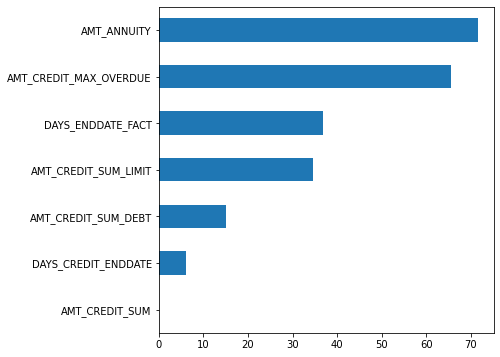

In [331]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in bur.columns if bur[i].isnull().any()]
percent_missing = bur[nan_cols].isna().sum() * 100 / len(bur)
plt.figure(figsize=(6, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [332]:
#On va mainteant séparé les prêts en cours et les prêts cloturés:

In [333]:
bur.groupby('CREDIT_ACTIVE').count()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD
CREDIT_ACTIVE,,,,,,,,,,,,,,,,,
Active,630607,630607,630607,630607,630607,558111,1969,218433,630607,630599,557060,457289,630607,630607,630607,199058,630607
Bad debt,21,21,21,21,21,20,10,15,21,21,15,12,21,21,21,1,21
Closed,1079273,1079273,1079273,1079273,1079273,1046843,1079148,371972,1079273,1079268,898730,665749,1079273,1079273,1079273,288622,1079273
Sold,6527,6527,6527,6527,6527,5901,1648,1520,6527,6527,2954,1598,6527,6527,6527,1956,6527


In [334]:
#Pour les active:
#On va créer une colonne 1 si Actif et 0 si non actif (les bad debts sont toutes épongées sauf une)
#Pour les non actif, on va simplement compter parmi eux le nombre d'anomalies:
#crédit avec overdue, DPD ou baddebts
#On crée donc 2 nouvelles colonnes:
bur['actif']=bur.apply(lambda x:1 if x['CREDIT_ACTIVE']=='Active' else 0,axis=1)
bur['anomalies']=bur.apply(lambda x:1 if x['CREDIT_ACTIVE']=='Bad debt' or x['CREDIT_DAY_OVERDUE']>0 or\
                           x['AMT_CREDIT_MAX_OVERDUE']>0 or x['AMT_CREDIT_SUM_OVERDUE']>0 \
                           or x['DPD']>0 else 0,axis=1)

In [335]:
actif=bur[bur['actif']==1].copy()
closed=bur[bur['actif']==0].copy()

# Traitement des pret encore en cours:

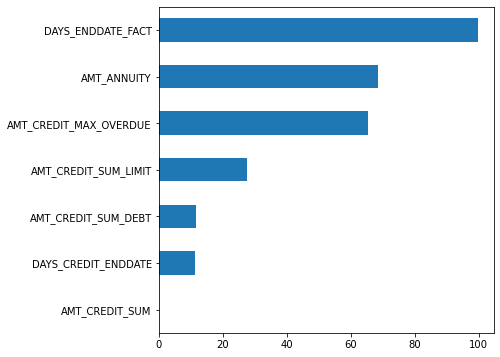

In [336]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in actif.columns if bur[i].isnull().any()]
percent_missing = actif[nan_cols].isna().sum() * 100 / len(actif)
plt.figure(figsize=(6, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

### AMT_CREDIT_SUM

In [337]:
actif[actif['AMT_CREDIT_SUM'].isnull()]


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies
218508,405791,6008179,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,654993.0,NaN,0.0,Another type of loan,-5,NaN,0.0,1,0
314570,418331,6064357,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,2250000.0,NaN,0.0,Another type of loan,-16,NaN,0.0,1,0
572703,367465,6299480,Active,currency 1,0,0,388.0,NaN,NaN,0,NaN,1204582.5,NaN,0.0,Another type of loan,-5,NaN,0.0,1,0
814128,425959,6388671,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,185926.5,NaN,0.0,Another type of loan,-3,NaN,0.0,1,0
987620,375588,5078559,Active,currency 1,0,0,NaN,NaN,NaN,0,NaN,1309572.0,NaN,0.0,Another type of loan,-39,NaN,0.0,1,0
1055762,118044,6753699,Active,currency 1,-422,0,643.0,NaN,NaN,0,NaN,0.0,NaN,0.0,Consumer credit,-29,15979.5,0.0,1,0
1176556,151540,5953196,Active,currency 1,-1067,0,777.0,NaN,NaN,0,NaN,0.0,NaN,0.0,Consumer credit,-14,31234.5,0.0,1,0
1176997,430459,5953707,Active,currency 1,-272,0,280.0,NaN,NaN,0,NaN,31464.0,NaN,0.0,Consumer credit,-26,31486.5,0.0,1,0


In [338]:
#On va prendre la valeur de AMT_CREDIT_SUM_DEBT pour les 5 premiers qui sont des nouveaux crédits#Pour les 3 derniers on a la durée restante et le montant des annuités on fait donc:
#durée restante*annuité/365
def creditsom(row):
    if row['AMT_CREDIT_SUM']==row['AMT_CREDIT_SUM']:
        return row['AMT_CREDIT_SUM']
    elif row['AMT_ANNUITY']!=row['AMT_ANNUITY']:
        return row['AMT_CREDIT_SUM_DEBT']
    else:
        return row['AMT_ANNUITY']*row['DAYS_CREDIT_ENDDATE']/365
actif['AMT_CREDIT_SUM']=actif.apply(lambda row: creditsom(row),axis=1) 

In [339]:
actif.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE        72496
DAYS_ENDDATE_FACT         628638
AMT_CREDIT_MAX_OVERDUE    412174
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 0
AMT_CREDIT_SUM_DEBT        73547
AMT_CREDIT_SUM_LIMIT      173318
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY               431549
DPD                            0
actif                          0
anomalies                      0
dtype: int64

In [340]:
actif.shape

(630607, 20)

In [341]:
actif

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN,0.0,1,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0,1,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0.0,1,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0,1,1
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716404,166279,5057599,Active,currency 1,-99,0,997.0,NaN,0.0,0,450000.0,432787.50,0.00,0.0,Consumer credit,-7,NaN,0.0,1,0
1716410,280228,5057642,Active,currency 1,-575,0,813.0,NaN,NaN,0,67500.0,0.00,0.00,0.0,Credit card,-46,NaN,0.0,1,0
1716412,288038,5057657,Active,currency 1,-541,0,7.0,NaN,NaN,0,225000.0,10971.00,0.00,0.0,Consumer credit,-11,NaN,0.0,1,0
1716417,433007,5057703,Active,currency 1,-740,0,31128.0,NaN,NaN,0,67500.0,2466.00,NaN,0.0,Credit card,-433,NaN,0.0,1,0


## DAYS_CREDIT_END_DATE

In [342]:
#quand on peut on récupère 'DAYS_ENDDATE_FACT' mais ce sont des prêts effectivements cloturés
actif['DAYS_CREDIT_ENDDATE']=actif.apply(lambda row: row['DAYS_ENDDATE_FACT'] if row['DAYS_CREDIT_ENDDATE']!=row['DAYS_CREDIT_ENDDATE'] and row['DAYS_ENDDATE_FACT']==row['DAYS_ENDDATE_FACT'] else row['DAYS_CREDIT_ENDDATE'],axis=1) 

In [343]:
actif.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN,0.0,1,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0,1,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0.0,1,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0,1,1
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,0.0,1,0


In [344]:
actif['AMT_CREDIT_SUM'].describe()

count    6.306070e+05
mean     5.304341e+05
std      1.227861e+06
min      0.000000e+00
25%      9.000000e+04
50%      2.125148e+05
75%      4.950000e+05
max      1.701000e+08
Name: AMT_CREDIT_SUM, dtype: float64

In [345]:
b=actif['DAYS_CREDIT']-actif['DAYS_CREDIT_ENDDATE']
b.describe()

count    558124.000000
mean      -3215.627117
std        6999.646347
min      -34092.000000
25%       -1826.000000
50%       -1229.000000
75%        -730.000000
max       41790.000000
dtype: float64

In [346]:
#Pour calculer le end date on va calculer le paiement jour moyen de chaque individu sur ses autres prets et on 
#va ainsi extrapoler la fin du paiement du crédit en question à partir des autres informations disponibles
#en cas d'aucune autre information on prendra la moyenne globale sur tout le tableau pour le type de pret
#en question

#On stocke la moyenne globale de remboursement quotidien sur l'ensemble des prêts
df=actif[actif['AMT_CREDIT_SUM']>0]
df=df[df['DAYS_CREDIT']!=df['DAYS_CREDIT_ENDDATE']]
df=df[['SK_ID_CURR','DAYS_CREDIT','DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM','CREDIT_TYPE']].copy()
df['quot']=(df['AMT_CREDIT_SUM']/(df['DAYS_CREDIT_ENDDATE']-df['DAYS_CREDIT']))
moyenne=df.groupby('CREDIT_TYPE').agg({'quot':'mean'})
moyenne

,quot
CREDIT_TYPE,
Another type of loan,248.491806
Car loan,1383.106327
Cash loan (non-earmarked),361.781237
Consumer credit,493.914955
Credit card,248.641155
Loan for business development,2351.272589
Loan for purchase of shares (margin lending),3011.095884
Loan for the purchase of equipment,1623.572828
Loan for working capital replenishment,1540.876811


In [405]:
moyenne['quot'].values

array([ 248.49180581, 1383.10632738,  361.78123681,  493.91495511,
        248.64115538, 2351.27258935, 3011.09588376, 1623.57282767,
       1540.87681125, 1051.60324189, 8132.53012048, 1087.71447291,
       3979.01876471,  542.43629699])

In [408]:
index_moyenne=['Another type of loan', 'Car loan', 'Cash loan (non-earmarked)','Consumer credit',\
 'Credit card', 'Loan for business development','Loan for purchase of shares (margin lending)',\
 'Loan for the purchase of equipment','Loan for working capital replenishment', 'Microloan',\
 'Mobile operator loan', 'Mortgage', 'Real estate loan','Unknown type of loan']
moyennes=pd.DataFrame([ 248.49180581, 1383.10632738,  361.78123681,  493.91495511,248.64115538, 2351.27258935,\
                       3011.09588376, 1623.57282767,1540.87681125, 1051.60324189, 8132.53012048, 1087.71447291,\
                       3979.01876471,  542.43629699],index=index_moyenne,columns=['quot'])

In [409]:
moyennes

,quot
Another type of loan,248.491806
Car loan,1383.106327
Cash loan (non-earmarked),361.781237
Consumer credit,493.914955
Credit card,248.641155
Loan for business development,2351.272589
Loan for purchase of shares (margin lending),3011.095884
Loan for the purchase of equipment,1623.572828
Loan for working capital replenishment,1540.876811
Microloan,1051.603242


In [347]:
actif['DAYS_CREDIT_ENDDATE'].describe()

count    558124.000000
mean       2547.152717
std        7006.384552
min      -42056.000000
25%         172.000000
50%         678.000000
75%        1289.000000
max       31199.000000
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [348]:

def creditend(row):
    #On va mettre une durée maximale de crédit à 30 ans pour les nan
    #si les crédits qui sont créés et cloturés le même jour:
    #On met à 0
    if row['DAYS_CREDIT']==row['DAYS_CREDIT_ENDDATE'] or row['AMT_CREDIT_SUM']<=1:
        return 0
    #si nan:
    elif row['DAYS_CREDIT_ENDDATE']!=row['DAYS_CREDIT_ENDDATE']:
        #Je récupère tous les crédit de la personne en question
        emprunteur=actif[actif['SK_ID_CURR']==row['SK_ID_CURR']][['DAYS_CREDIT','DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM','CREDIT_TYPE','DAYS_CREDIT_UPDATE']]
        #Je ne garde que les valeurs non nulles de end_date
        df=emprunteur[-emprunteur['DAYS_CREDIT_ENDDATE'].isnull()]
        #J'enlève éventuellement les crédit qui sont cloturés les mêmes jours
        df=df[-df['DAYS_CREDIT']==df['DAYS_CREDIT_ENDDATE']]
        #Je filtre sur le type d'emprunt et ne conserve que les emprunt positifs
        emprunttype=df[df['CREDIT_TYPE']==row['CREDIT_TYPE']]
        emprunttype=emprunttype[emprunttype['AMT_CREDIT_SUM']>0]
        #SI je n'ai aucun type d'emprunt similaire je prends la moyenne globale de ce type d'emprunt
        if len(emprunttype)==0:
            #Je renvois le montant divisé par la somme moyenne auquel j'enlève les jours écoulés
            return min(row['AMT_CREDIT_SUM']/moyenne.loc[row['CREDIT_TYPE']]['quot']+row['DAYS_CREDIT'],11000)
        else: 
            #Je calcule la moyenne
            moyennequot=(emprunttype['AMT_CREDIT_SUM']/(emprunttype['DAYS_CREDIT_ENDDATE']-emprunttype['DAYS_CREDIT'])).mean()
            return min((row['AMT_CREDIT_SUM']/moyennequot)+row['DAYS_CREDIT'],11000)
    else:
        return row['DAYS_CREDIT_ENDDATE']
    

    

In [349]:
actif['DAYS_CREDIT_ENDDATE']=actif.apply(lambda x: creditend(x),axis=1)

In [350]:
actif['DAYS_CREDIT_ENDDATE'].describe()

count    630607.000000
mean       2109.911765
std        6349.602865
min      -42056.000000
25%          58.000000
50%         522.000000
75%        1155.000000
max       31199.000000
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [351]:
#On va mettre à jour DAYS_CREDIT_END_DATE et DAYS_CREDIT avec DAYS_CREDIT_UPDATE:
actif['DAYS_CREDIT_ENDDATE']+=actif['DAYS_CREDIT_UPDATE']
actif['DAYS_CREDIT']+=actif['DAYS_CREDIT_UPDATE']

In [352]:
actif[actif['DAYS_CREDIT_ENDDATE']>0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies
1,215354,5714463,Active,currency 1,-228,0,1055.00000,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN,0.0,1,0
2,215354,5714464,Active,currency 1,-219,0,512.00000,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0,1,0
3,215354,5714465,Active,currency 1,-219,0,142.96743,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0.0,1,0
4,215354,5714466,Active,currency 1,-650,0,1176.00000,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0,1,1
5,215354,5714467,Active,currency 1,-304,0,27429.00000,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716400,318662,5057561,Active,currency 1,-885,0,941.00000,NaN,NaN,0,147150.0,105358.50,0.00,0.0,Consumer credit,-70,NaN,0.0,1,0
1716403,361928,5057589,Active,currency 1,-891,0,935.00000,NaN,NaN,0,1431000.0,1092226.50,0.00,0.0,Consumer credit,-126,NaN,0.0,1,0
1716404,166279,5057599,Active,currency 1,-106,0,990.00000,NaN,0.0,0,450000.0,432787.50,0.00,0.0,Consumer credit,-7,NaN,0.0,1,0
1716410,280228,5057642,Active,currency 1,-621,0,767.00000,NaN,NaN,0,67500.0,0.00,0.00,0.0,Credit card,-46,NaN,0.0,1,0


In [353]:
#et maintenant on va rajouter les crédit terminés aux closed:
closed=closed.append(actif[actif['DAYS_CREDIT_ENDDATE']<=0])
actif=actif[actif['DAYS_CREDIT_ENDDATE']>0]

In [354]:
len(bur)

1716428

In [355]:
len(actif)

480051

In [356]:
len(closed)

1236377

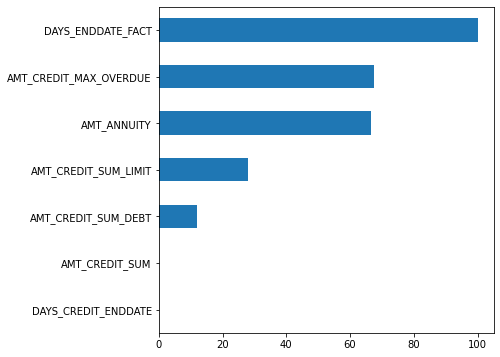

In [357]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in actif.columns if bur[i].isnull().any()]
percent_missing = actif[nan_cols].isna().sum() * 100 / len(actif)
plt.figure(figsize=(6, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [358]:
#AMT_CREDIT_MAX_OVERDUE on va mettre les valeurs manquantes à 0
actif['AMT_CREDIT_MAX_OVERDUE']=actif['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

<ipython-input-358-a933ef6cd538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actif['AMT_CREDIT_MAX_OVERDUE']=actif['AMT_CREDIT_MAX_OVERDUE'].fillna(0)


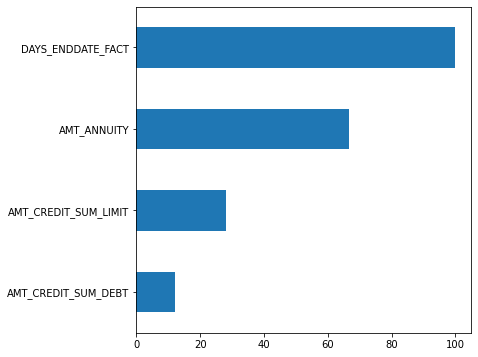

In [359]:
#Observation des pourcentages de valeurs manquantes par colonnes ayant des valeurs manquantes

nan_cols = [i for i in actif.columns if actif[i].isnull().any()]
percent_missing = actif[nan_cols].isna().sum() * 100 / len(actif)
plt.figure(figsize=(6, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [360]:
actif

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies
1,215354,5714463,Active,currency 1,-228,0,1055.00000,NaN,0.0,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN,0.0,1,0
2,215354,5714464,Active,currency 1,-219,0,512.00000,NaN,0.0,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0.0,1,0
3,215354,5714465,Active,currency 1,-219,0,142.96743,NaN,0.0,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0.0,1,0
4,215354,5714466,Active,currency 1,-650,0,1176.00000,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0.0,1,1
5,215354,5714467,Active,currency 1,-304,0,27429.00000,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716400,318662,5057561,Active,currency 1,-885,0,941.00000,NaN,0.0,0,147150.0,105358.50,0.00,0.0,Consumer credit,-70,NaN,0.0,1,0
1716403,361928,5057589,Active,currency 1,-891,0,935.00000,NaN,0.0,0,1431000.0,1092226.50,0.00,0.0,Consumer credit,-126,NaN,0.0,1,0
1716404,166279,5057599,Active,currency 1,-106,0,990.00000,NaN,0.0,0,450000.0,432787.50,0.00,0.0,Consumer credit,-7,NaN,0.0,1,0
1716410,280228,5057642,Active,currency 1,-621,0,767.00000,NaN,0.0,0,67500.0,0.00,0.00,0.0,Credit card,-46,NaN,0.0,1,0


## AMT_ANNUITY

In [361]:
#On va faire AMT_CREDIT/(DAY_CRDIT_ENDDATE-DAYS_CREDIT):
actif['AMT_ANNUITY']=actif.apply(lambda x: x['AMT_ANNUITY'] if x['AMT_ANNUITY']==x['AMT_ANNUITY']\
                                       else x['AMT_CREDIT_SUM']/(x['DAYS_CREDIT_ENDDATE']-x['DAYS_CREDIT']),axis=1)

<ipython-input-361-4b05d893192a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actif['AMT_ANNUITY']=actif.apply(lambda x: x['AMT_ANNUITY'] if x['AMT_ANNUITY']==x['AMT_ANNUITY']\


## AMT_CREDIT_SUM_DEBT

In [362]:
#On va proportionner le montant du credit au temps restant pour calculer ce qui reste à payer
actif['AMT_CREDIT_SUM_DEBT']=actif.apply(lambda x: x['AMT_CREDIT_SUM_DEBT'] if \
                                         x['AMT_CREDIT_SUM_DEBT']==x['AMT_CREDIT_SUM_DEBT']\
                                       else x['AMT_CREDIT_SUM']*x['DAYS_CREDIT_ENDDATE']/\
                                         (x['DAYS_CREDIT_ENDDATE']-x['DAYS_CREDIT']),axis=1)

<ipython-input-362-cc0a30b4065c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actif['AMT_CREDIT_SUM_DEBT']=actif.apply(lambda x: x['AMT_CREDIT_SUM_DEBT'] if \


In [363]:
actif.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE            0
DAYS_ENDDATE_FACT         479808
AMT_CREDIT_MAX_OVERDUE         0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 0
AMT_CREDIT_SUM_DEBT            0
AMT_CREDIT_SUM_LIMIT      134100
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
AMT_ANNUITY                    0
DPD                            0
actif                          0
anomalies                      0
dtype: int64

In [364]:
actif[actif.AMT_CREDIT_SUM.isnull()]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DPD,actif,anomalies


## extraction des features:

In [378]:
#On va extraire des crédits actifs:
#Nb de crédits actifs
#Montant restant à rembourser
#Annuité à rembourser (max et mean)
#durée de remboursement restante (max et mean)
#% de crédits en cours avec anomalies

bb_agg=actif.groupby('SK_ID_CURR').agg({'AMT_CREDIT_SUM_DEBT':['count','sum'],'AMT_ANNUITY':['max','mean'],
                                        'DAYS_CREDIT_ENDDATE':['max','mean'],'anomalies':'sum',\
                                       'AMT_CREDIT_MAX_OVERDUE':['max']})
bb_agg.columns=pd.Index(['bb_credits','bb_debt','bb_annuités_max','bb_annuités_mean','bb_duration_max','bb_duration_mean',\
                'bb_%_anomalies','bb_%_max_overdue_active'])




In [379]:
bb_agg

,bb_credits,bb_debt,bb_annuités_max,bb_annuités_mean,bb_duration_max,bb_duration_mean,bb_%_anomalies
SK_ID_CURR,,,,,,,
100001,3,5.966865e+05,10822.500000,8272.500000,1762.0,1019.666667,1
100002,2,2.457810e+05,0.000000,0.000000,773.0,387.326770,2
100003,1,0.000000e+00,444.566411,444.566411,1173.0,1173.000000,0
100005,2,5.684085e+05,4261.500000,2130.750000,1313.0,702.000000,0
100008,1,2.400570e+05,487.442623,487.442623,455.0,455.000000,0
...,...,...,...,...,...,...,...
456247,3,2.284854e+06,4329.000000,1537.801642,10605.0,7438.333333,2
456249,1,1.630710e+05,97.508126,97.508126,1351.0,1351.000000,0
456250,2,2.232040e+06,51799.500000,39778.447500,2309.0,2041.500000,0


In [380]:
bb_agg['bb_%_anomalies']=bb_agg['bb_%_anomalies']/bb_agg['bb_credits']
bb_agg

,bb_credits,bb_debt,bb_annuités_max,bb_annuités_mean,bb_duration_max,bb_duration_mean,bb_%_anomalies
SK_ID_CURR,,,,,,,
100001,3,5.966865e+05,10822.500000,8272.500000,1762.0,1019.666667,0.333333
100002,2,2.457810e+05,0.000000,0.000000,773.0,387.326770,1.000000
100003,1,0.000000e+00,444.566411,444.566411,1173.0,1173.000000,0.000000
100005,2,5.684085e+05,4261.500000,2130.750000,1313.0,702.000000,0.000000
100008,1,2.400570e+05,487.442623,487.442623,455.0,455.000000,0.000000
...,...,...,...,...,...,...,...
456247,3,2.284854e+06,4329.000000,1537.801642,10605.0,7438.333333,0.666667
456249,1,1.630710e+05,97.508126,97.508126,1351.0,1351.000000,0.000000
456250,2,2.232040e+06,51799.500000,39778.447500,2309.0,2041.500000,0.000000


# Traitement des prets cloturés:

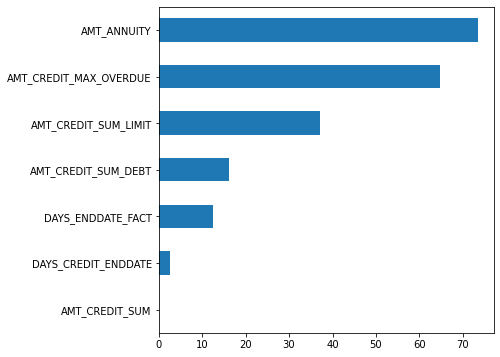

In [381]:
nan_cols = [i for i in closed.columns if bur[i].isnull().any()]
percent_missing = closed[nan_cols].isna().sum() * 100 / len(closed)
plt.figure(figsize=(6, 6))
percent_missing.sort_values().plot(kind='barh')
plt.show()

In [394]:
#Au final on ne va extraire que les crédits avec des anomalies et on en prendra leur pourcentage:
clos=closed[['SK_ID_CURR','anomalies']].groupby('SK_ID_CURR').agg({'anomalies':['count','sum']})
clos['%_anomalies_past_credits']=clos[('anomalies','sum')]/clos[('anomalies','count')]
clos.columns=pd.Index(['count','sum','bb_%_anomalies_past_credits'])

In [395]:
clos

,count,sum,bb_%_anomalies_past_credits
SK_ID_CURR,,,
100001,4,0,0.000000
100002,6,5,0.833333
100003,3,0,0.000000
100004,2,0,0.000000
100005,1,0,0.000000
...,...,...,...
456249,12,2,0.166667
456250,1,0,0.000000
456253,2,0,0.000000


In [397]:
test=pd.merge(bb_agg,clos[['bb_%_anomalies_past_credits']],left_index=True,right_index=True,how='outer')

In [399]:
test.fillna(0)

,bb_credits,bb_debt,bb_annuités_max,bb_annuités_mean,bb_duration_max,bb_duration_mean,bb_%_anomalies,bb_%_anomalies_past_credits
SK_ID_CURR,,,,,,,,
100001,3.0,596686.500,10822.500000,8272.500000,1762.0,1019.666667,0.333333,0.000000
100002,2.0,245781.000,0.000000,0.000000,773.0,387.326770,1.000000,0.833333
100003,1.0,0.000,444.566411,444.566411,1173.0,1173.000000,0.000000,0.000000
100004,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
100005,2.0,568408.500,4261.500000,2130.750000,1313.0,702.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
456249,1.0,163071.000,97.508126,97.508126,1351.0,1351.000000,0.000000,0.166667
456250,2.0,2232040.095,51799.500000,39778.447500,2309.0,2041.500000,0.000000,0.000000
456253,2.0,1795833.000,58369.500000,29800.850767,1108.0,658.000000,0.000000,0.000000


In [12]:
bureau_et_balance(pd.read_csv('bureau_balance.csv'),pd.read_csv('bureau.csv'))

,bb_credits,bb_debt,bb_annuités_max,bb_annuités_mean,bb_duration_max,bb_duration_mean,bb_%_anomalies,bb_max_overdue_active,bb_%_anomalies_past_credits,bb_max_overdue_closed
SK_ID_CURR,,,,,,,,,,
100001,3.0,596686.500,10822.500000,8272.500000,1762.0,1019.666667,0.333333,0.000,0.000000,0.000
100002,2.0,245781.000,0.000000,0.000000,773.0,387.326770,1.000000,40.500,0.833333,5043.645
100003,1.0,0.000,444.566411,444.566411,1173.0,1173.000000,0.000000,0.000,0.000000,0.000
100004,0.0,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000
100005,2.0,568408.500,4261.500000,2130.750000,1313.0,702.000000,0.000000,0.000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...
456249,1.0,163071.000,97.508126,97.508126,1351.0,1351.000000,0.000000,0.000,0.166667,18945.000
456250,2.0,2232040.095,51799.500000,39778.447500,2309.0,2041.500000,0.000000,0.000,0.000000,0.000
456253,2.0,1795833.000,58369.500000,29800.850767,1108.0,658.000000,0.000000,0.000,0.000000,0.000


<a id="section6.3"> </a>
## C/ Extraction des features

In [11]:
#Les constantes de change
change2=6.6
change3=3.8
change4=3.1
#Les moyennes des rembousements de prets pour les valeurs manquantes
index_moyenne=['Another type of loan', 'Car loan', 'Cash loan (non-earmarked)','Consumer credit',\
 'Credit card', 'Loan for business development','Loan for purchase of shares (margin lending)',\
 'Loan for the purchase of equipment','Loan for working capital replenishment', 'Microloan',\
 'Mobile operator loan', 'Mortgage', 'Real estate loan','Unknown type of loan']
moyennes=pd.DataFrame([ 248.49180581, 1383.10632738,  361.78123681,  493.91495511,248.64115538, 2351.27258935,\
                       3011.09588376, 1623.57282767,1540.87681125, 1051.60324189, 8132.53012048, 1087.71447291,\
                       3979.01876471,  542.43629699],index=index_moyenne,columns=['quot'])

def creditsom(row):
    """ Fonctions pour imputation de AMT_CREDIT_SUM"""
    if row['AMT_CREDIT_SUM']==row['AMT_CREDIT_SUM']:
        return row['AMT_CREDIT_SUM']
    elif row['AMT_ANNUITY']!=row['AMT_ANNUITY']:
        return row['AMT_CREDIT_SUM_DEBT']
    else:
        return row['AMT_ANNUITY']*row['DAYS_CREDIT_ENDDATE']/365

def currency(row,i):
    """Fonction de conversion des lignes en la devise principale"""
    if row['CREDIT_CURRENCY']=='currency 2':
        return row[i]/change2
    elif row['CREDIT_CURRENCY']=='currency 3':
        return row[i]/change3
    elif row['CREDIT_CURRENCY']=='currency 4':
        return row[i]/change4
    else:
        return row[i]

 
    

def bureau_et_balance(bb,bureau):
    """
    Loads applications bureau and bureau balance
    Fill nan values
    Remove outliers
    Meanwhile and afterwards, feature engineering steps are implemented.
    Returns dataframe with feature engineering including new implemented features.
    """
    ###########################################################################################################
    #############################     Traitement de Bureau_Balance            #################################
    ###########################################################################################################
    
    #On cherche les contrats avec des DPDs
    bb['DPD']=bb['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '5', '4'] else 0)
    #On compte le nombre de DPD par contrat
    bb_agg = bb.groupby('SK_ID_BUREAU').agg({'DPD':'sum'})
    
    ###########################################################################################################
    #############################             Traitement de Bureau            #################################
    ###########################################################################################################
    
    ####################################       Prétraitement   ################################################
    
    #Conversion des montants en autres devises:
    for i in ['AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT',\
              'AMT_CREDIT_SUM_LIMIT','AMT_CREDIT_SUM_OVERDUE','AMT_ANNUITY']:
        bureau[i]=bureau.apply(lambda x:currency(x,i),axis=1)
    #récupération des infos des tableaux précédents
    bureau=pd.merge(bureau,bb_agg,left_on='SK_ID_BUREAU',right_index=True, how='left')
    
    #nettoyage mémoire
    del bb, bb_agg
    
    #On crée donc 2 nouvelles colonnes:
    bureau['actif']=bureau.apply(lambda x:1 if x['CREDIT_ACTIVE']=='Active' else 0,axis=1)
    bureau['anomalies']=bureau.apply(lambda x:1 if x['CREDIT_ACTIVE']=='Bad debt' or x['CREDIT_DAY_OVERDUE']>0 or\
                           x['AMT_CREDIT_MAX_OVERDUE']>0 or x['AMT_CREDIT_SUM_OVERDUE']>0 \
                           or x['DPD']>0 else 0,axis=1)
    
    #On supprime les colonnes inutiles
    bureau.drop(['CREDIT_CURRENCY','CREDIT_ACTIVE','DPD','AMT_CREDIT_SUM_OVERDUE','CREDIT_DAY_OVERDUE'],axis=1,inplace=True)
    
    #Séparation prets actifs et en cours
    actif=bureau[bureau['actif']==1].copy()
    closed=bureau[bureau['actif']==0].copy()
    
    del bureau
    
    ################# Imputation des valeurs manquantes des crédits actifs ######################################
    
    ########## AMT_CREDIT_SUM
    
    actif['AMT_CREDIT_SUM']=actif.apply(lambda row: creditsom(row),axis=1) 
    
    ######### DAYS_CREDIT_ENDDATE
    
    def creditend(row):
        """ Fonction pour le remplissage des données manquantes pour le calcul de la fin du crédit """
        #On va mettre une durée maximale de crédit à 30 ans pour les nan
        #si les crédits qui sont créés et cloturés le même jour ou de montant nul ou avec un days enddate fact:
        #On met à 0
        if row['DAYS_CREDIT']==row['DAYS_CREDIT_ENDDATE'] or row['AMT_CREDIT_SUM']<=1 or \
        row['DAYS_ENDDATE_FACT']==row['DAYS_ENDDATE_FACT']:
            return 0
        #si nan:
        elif row['DAYS_CREDIT_ENDDATE']!=row['DAYS_CREDIT_ENDDATE']:
            #Je récupère tous les crédit de la personne en question
            emprunteur=actif[actif['SK_ID_CURR']==row['SK_ID_CURR']][['DAYS_CREDIT','DAYS_CREDIT_ENDDATE','AMT_CREDIT_SUM','CREDIT_TYPE','DAYS_CREDIT_UPDATE']]
            #Je ne garde que les valeurs non nulles de end_date
            df=emprunteur[-emprunteur['DAYS_CREDIT_ENDDATE'].isnull()]
            #J'enlève éventuellement les crédit qui sont cloturés les mêmes jours
            df=df[-df['DAYS_CREDIT']==df['DAYS_CREDIT_ENDDATE']]
            #Je filtre sur le type d'emprunt et ne conserve que les emprunt positifs
            emprunttype=df[df['CREDIT_TYPE']==row['CREDIT_TYPE']]
            emprunttype=emprunttype[emprunttype['AMT_CREDIT_SUM']>0]
            #SI je n'ai aucun type d'emprunt similaire je prends la moyenne globale de ce type d'emprunt
            if len(emprunttype)==0:
                #Je renvois le montant divisé par la somme moyenne auquel j'enlève les jours écoulés
                return min(row['AMT_CREDIT_SUM']/moyennes.loc[row['CREDIT_TYPE']]['quot']+row['DAYS_CREDIT'],11000)
            else: 
                #Je calcule la moyenne
                moyennequot=(emprunttype['AMT_CREDIT_SUM']/(emprunttype['DAYS_CREDIT_ENDDATE']-emprunttype['DAYS_CREDIT'])).mean()
                return min((row['AMT_CREDIT_SUM']/moyennequot)+row['DAYS_CREDIT'],11000)
        else:
            return row['DAYS_CREDIT_ENDDATE']
    
    actif['DAYS_CREDIT_ENDDATE']=actif.apply(lambda x: creditend(x),axis=1)
    
    #Mise à jour DAYS_CREDIT_END_DATE et DAYS_CREDIT avec DAYS_CREDIT_UPDATE:
    actif['DAYS_CREDIT_ENDDATE']+=actif['DAYS_CREDIT_UPDATE']
    actif['DAYS_CREDIT']+=actif['DAYS_CREDIT_UPDATE']
    
    #Mise à jour des crédits closes et actifs en fonction des nouvelles dates:
    closed=closed.append(actif[actif['DAYS_CREDIT_ENDDATE']<=0])
    actif=actif[actif['DAYS_CREDIT_ENDDATE']>0]
    
    ########### AMT_ANNUITY
    actif['AMT_ANNUITY']=actif.apply(lambda x: x['AMT_ANNUITY'] if x['AMT_ANNUITY']==x['AMT_ANNUITY']\
                                       else x['AMT_CREDIT_SUM']/(x['DAYS_CREDIT_ENDDATE']-x['DAYS_CREDIT']),axis=1)
    
    
    ########## AMT_CREDIT_SUM_DEBT
    actif['AMT_CREDIT_SUM_DEBT']=actif.apply(lambda x: x['AMT_CREDIT_SUM_DEBT'] if \
                                         x['AMT_CREDIT_SUM_DEBT']==x['AMT_CREDIT_SUM_DEBT']\
                                       else x['AMT_CREDIT_SUM']*x['DAYS_CREDIT_ENDDATE']/\
                                         (x['DAYS_CREDIT_ENDDATE']-x['DAYS_CREDIT']),axis=1)
    
    
    ###############################   Création de nouvelles features     #######################################
    
    ######### Sur les crédits en cours
    
    bb_agg=actif.groupby('SK_ID_CURR').agg({'AMT_CREDIT_SUM_DEBT':['count','sum'],'AMT_ANNUITY':['max','mean'],
                                        'DAYS_CREDIT_ENDDATE':['max','mean'],'anomalies':'sum',\
                                       'AMT_CREDIT_MAX_OVERDUE':['max']})
    
    del actif
    
    bb_agg.columns=pd.Index(['bb_credits','bb_debt','bb_annuités_max','bb_annuités_mean','bb_duration_max',\
                             'bb_duration_mean','bb_%_anomalies','bb_max_overdue_active'])
    bb_agg['bb_%_anomalies']=bb_agg['bb_%_anomalies']/bb_agg['bb_credits']
    
    ######### Sur les crédits cloturés
    
    clos=closed[['SK_ID_CURR','anomalies','AMT_CREDIT_MAX_OVERDUE']].groupby('SK_ID_CURR').agg({'anomalies':['count','sum'],\
                                                                       'AMT_CREDIT_MAX_OVERDUE':['max']})
    clos['%_anomalies_past_credits']=clos[('anomalies','sum')]/clos[('anomalies','count')]
    clos.columns=pd.Index(['count','sum','bb_max_overdue_closed','bb_%_anomalies_past_credits'])
    
    del closed
    
    return pd.merge(bb_agg,clos[['bb_%_anomalies_past_credits','bb_max_overdue_closed']],left_index=True,right_index=True,how='outer').fillna(0)
    

<a id="section7"> </a>
# 7. Extraction du tableau de données

In [400]:
ls

 application_test.csv
 application_train.csv
 bureau_balance.csv
 bureau.csv
 CCB.csv
 credit_card_balance.csv
 exampleccb.csv
 git/
 HomeCredit_columns_description.csv
 home_credit.png
 installments.csv
 installments_payments.csv
 inst.csv
'NG_P7_implementez-un-modele-de-scoring_2020-11-10T134305 (3)'/
'NG_P7_implementez-un-modele-de-scoring_2020-11-10T134305 (3).zip'
 P7.ipynb
 POS_CASH_balance.csv
 previous_application.csv
 Projet+Mise+en+prod+-+home-credit-default-risk/
 Projet+Mise+en+prod+-+home-credit-default-risk.zip
 sample_submission.csv
 test.csv
 Untitled.ipynb


In [32]:
from sklearn.impute import KNNImputer
#Chargement et traitement des base de données entrainement et test
train=application(pd.read_csv('application_train.csv'),train=True)
test=application(pd.read_csv('application_test.csv'),train=False)
#Concaténation des deux tableaux
data=train.append(test)
del train,test

#Chargement et traitement de Bureau et Bureau Balance
new=bureau_et_balance(pd.read_csv('bureau_balance.csv'),pd.read_csv('bureau.csv'))
#Merging avec les applications en data
data=pd.merge(data,new,left_on='SK_ID_CURR',right_index=True,how='left')

#Chargement et traitement de CreditCard
new=CCB(pd.read_csv('credit_card_balance.csv'))
#Merging et cleaning
data=pd.merge(data,new,left_on='SK_ID_CURR',right_index=True,how='left')

#Chargement de POSCash et traitement
new=POScash(pd.read_csv('POS_CASH_balance.csv'),pd.read_csv('previous_application.csv'))
#Merging et cleaning
data=pd.merge(data,new,left_on='SK_ID_CURR',right_index=True,how='left')

#Chargement et traitement de Installements
new=installments(pd.read_csv('installments_payments.csv'))
#Merging et cleaning
data=pd.merge(data,new,left_on='SK_ID_CURR',right_index=True,how='left')

#Chargement et traitement de previous
new=previous_app(pd.read_csv('previous_application.csv'))
#Merging et cleaning
data=pd.merge(data,new,left_on='SK_ID_CURR',right_index=True,how='left')

del new

#Sauvegarde du fichier final
data.to_csv('data.csv')




In [33]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INST_payment_perc_sum,INST_payment_perc_var,INST_payment_diff_max,INST_payment_diff_mean,INST_payment_diff_sum,INST_payment_diff_var,prev_%_rejected,prev_%_x-sell,prev_%_notinsured,prev_%_nodownpayment
0,100002,1.0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,18.998036,4.191596e-10,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,1.000000,1.000000
1,100003,0.0,1,1,0,0,270000.0,1293502.5,35698.5,1129500.0,...,24.998062,4.857007e-09,0.000,0.000000,0.000,0.000000e+00,0.0,0.333333,0.333333,0.666667
2,100004,0.0,0,0,1,0,67500.0,135000.0,6750.0,135000.0,...,2.999532,2.825330e-09,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,1.000000,0.000000
3,100006,0.0,1,1,1,0,135000.0,312682.5,29686.5,297000.0,...,15.997978,2.726261e-08,0.000,0.000000,0.000,0.000000e+00,0.0,0.444444,1.000000,0.600000
4,100007,0.0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,62.988906,4.397993e-02,22655.655,452.384318,29857.365,8.084830e+06,0.0,0.500000,0.500000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,1,1,1,0,121500.0,412560.0,17473.5,270000.0,...,2.999855,1.461666e-09,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.000000,1.000000
48740,456222,NaN,1,1,0,2,157500.0,622413.0,31909.5,495000.0,...,69.988355,3.371193e-02,9680.490,314.714589,22974.165,2.023069e+06,0.0,0.250000,0.500000,0.750000
48741,456223,NaN,1,1,1,1,202500.0,315000.0,33205.5,315000.0,...,7.999512,4.364509e-10,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,1.000000,0.500000
48742,456224,NaN,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,28.997379,4.482306e-09,0.000,0.000000,0.000,0.000000e+00,0.0,0.200000,1.000000,0.500000


In [35]:
train

NameError: name 'train' is not defined

In [34]:
from pycaret.classification import *
clf1 = setup(data=train, target = 'TARGET')

NameError: name 'train' is not defined